# CS619 — Prototyping Phase (Model Training) with YOLOv5

###Environment setup

In [ ]:
# Environment setup for local execution\nimport os, sys, subprocess\n\ndef run(cmd):\n    print('>>', cmd)\n    subprocess.check_call(cmd, shell=True)\n\n# Check if YOLOv5 is installed\nif not os.path.isdir('yolov5'):\n    print('ERROR: YOLOv5 not found. Please run setup_env.sh first.')\n    sys.exit(1)\n\n# Add YOLOv5 to path\nsys.path.insert(0, 'yolov5')\n\nimport torch, yaml, glob, random, cv2\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\nprint('Python:', sys.version)\nprint('PyTorch:', torch.__version__)\nprint('CUDA available:', torch.cuda.is_available())\nif torch.cuda.is_available():\n    print('GPU:', torch.cuda.get_device_name(0))\nelse:\n    print('⚠️ Running on CPU; training will be slow. Use a GPU if possible.')\n

>> pip install -q -r /content/yolov5/requirements.txt
>> pip install -q matplotlib pandas opencv-python pyyaml
Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
PyTorch: 2.8.0+cu126
CUDA available: True
GPU: Tesla T4


###Configure dataset paths & data.yaml

In [ ]:
# Dataset is already available locally in design/ folder\n# No need to mount Google Drive or unzip\n\n# Verify dataset exists\nimport os\nassert os.path.isdir('design/Train_Set/images'), 'Train images not found'\nassert os.path.isdir('design/Train_Set/labels'), 'Train labels not found'\nassert os.path.isdir('design/Test_Set/images'), 'Test images not found'\nassert os.path.isdir('design/Test_Set/labels'), 'Test labels not found'\nprint('✓ Dataset verified')\n

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Class list:\nCLASS_NAMES = ['chicken', 'daal', 'mixsweet', 'naan', 'rice', 'roti', 'salad', 'yogurt']\n\n# Local paths (relative to notebook directory):\nTRAIN_IMAGES = 'design/Train_Set/images'\nTRAIN_LABELS = 'design/Train_Set/labels'\nTEST_IMAGES  = 'design/Test_Set/images'\nTEST_LABELS  = 'design/Test_Set/labels'\n\nassert os.path.isdir(TRAIN_IMAGES) and os.path.isdir(TRAIN_LABELS)\nassert os.path.isdir(TEST_IMAGES) and os.path.isdir(TEST_LABELS)\n\n# For YOLOv5, we need a data.yaml specifying 'train', 'val', and (optionally) 'test' image dirs.\ndata_yaml = {\n    'path': '/home/danish/University/FYP/multi-food-classification/Prototype_Phase',\n    'train': TRAIN_IMAGES,\n    'val': TEST_IMAGES,\n    'test': TEST_IMAGES,\n    'names': CLASS_NAMES,\n    'nc': len(CLASS_NAMES)\n}\nos.makedirs('data', exist_ok=True)\nDATA_YAML_PATH = 'data/food_yolov5_data.yaml'\nimport yaml\nwith open(DATA_YAML_PATH, 'w') as f:\n    yaml.dump(data_yaml, f, sort_keys=False)\n\nprint('✓ Wrote data.yaml to:', DATA_YAML_PATH)\nprint(yaml.safe_dump(data_yaml, sort_keys=False))\n

✅ Wrote data.yaml to: /content/data/food_yolov5_data.yaml
path: /content
train: /content/Train_Set/images
val: /content/Test_Set/images
test: /content/Test_Set/images
names:
- chicken
- daal
- mixsweet
- naan
- rice
- roti
- salad
- yogurt
nc: 8



###Quick dataset sanity check (visualize a few boxes)

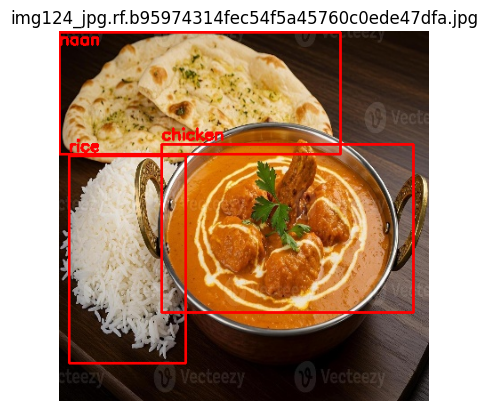

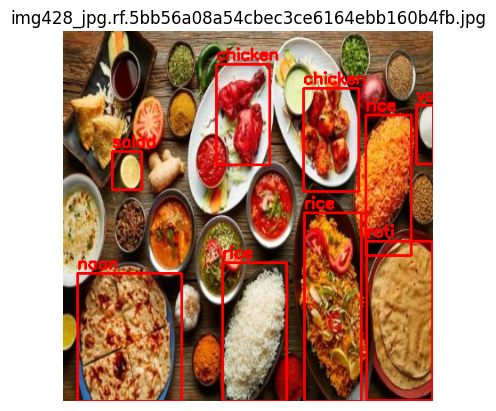

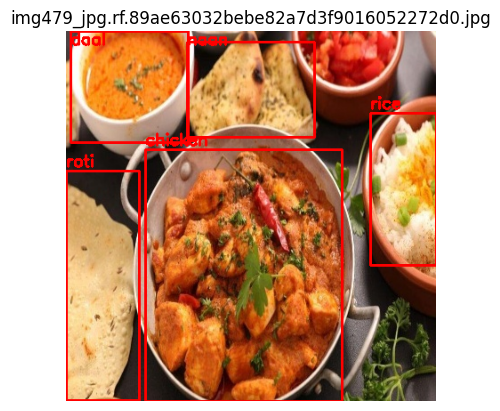

In [ ]:
# Class list:\nCLASS_NAMES = ['chicken', 'daal', 'mixsweet', 'naan', 'rice', 'roti', 'salad', 'yogurt']\n\n# Local paths (relative to notebook directory):\nTRAIN_IMAGES = 'design/Train_Set/images'\nTRAIN_LABELS = 'design/Train_Set/labels'\nTEST_IMAGES  = 'design/Test_Set/images'\nTEST_LABELS  = 'design/Test_Set/labels'\n\nassert os.path.isdir(TRAIN_IMAGES) and os.path.isdir(TRAIN_LABELS)\nassert os.path.isdir(TEST_IMAGES) and os.path.isdir(TEST_LABELS)\n\n# For YOLOv5, we need a data.yaml specifying 'train', 'val', and (optionally) 'test' image dirs.\ndata_yaml = {\n    'path': '/home/danish/University/FYP/multi-food-classification/Prototype_Phase',\n    'train': TRAIN_IMAGES,\n    'val': TEST_IMAGES,\n    'test': TEST_IMAGES,\n    'names': CLASS_NAMES,\n    'nc': len(CLASS_NAMES)\n}\nos.makedirs('data', exist_ok=True)\nDATA_YAML_PATH = 'data/food_yolov5_data.yaml'\nimport yaml\nwith open(DATA_YAML_PATH, 'w') as f:\n    yaml.dump(data_yaml, f, sort_keys=False)\n\nprint('✓ Wrote data.yaml to:', DATA_YAML_PATH)\nprint(yaml.safe_dump(data_yaml, sort_keys=False))\n

###Choose & download a YOLOv5 pre-trained model

In [ ]:
MODEL_WEIGHTS = 'yolov5s.pt'
# Other options: yolov5n.pt (nano), yolov5s.pt (small), yolov5m.pt, yolov5l.pt, yolov5x.pt

print("Using weights:", MODEL_WEIGHTS)

Using weights: yolov5s.pt


###Train (Key hyperparameters)

In [ ]:
EPOCHS = 50           # 50–100
BATCH_SIZE = 16
IMG_SIZE = 640

# Launch YOLOv5 training
%cd yolov5
!python train.py --img {IMG_SIZE} --batch {BATCH_SIZE} --epochs {EPOCHS} --data {DATA_YAML_PATH} --weights {MODEL_WEIGHTS} --name cs619_yolov5

# The run artifacts will be in yolov5/runs/train/cs619_yolov5*

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-09-12 05:58:47.954671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757656727.974601    4470 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757656727.980656    4470 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for 

###Monitor (Plot losses & key metrics)

Run dir: /content/yolov5/runs/train/cs619_yolov5
Columns: ['               epoch', '      train/box_loss', '      train/obj_loss', '      train/cls_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss', '        val/obj_loss', '        val/cls_loss', '               x/lr0', '               x/lr1', '               x/lr2']


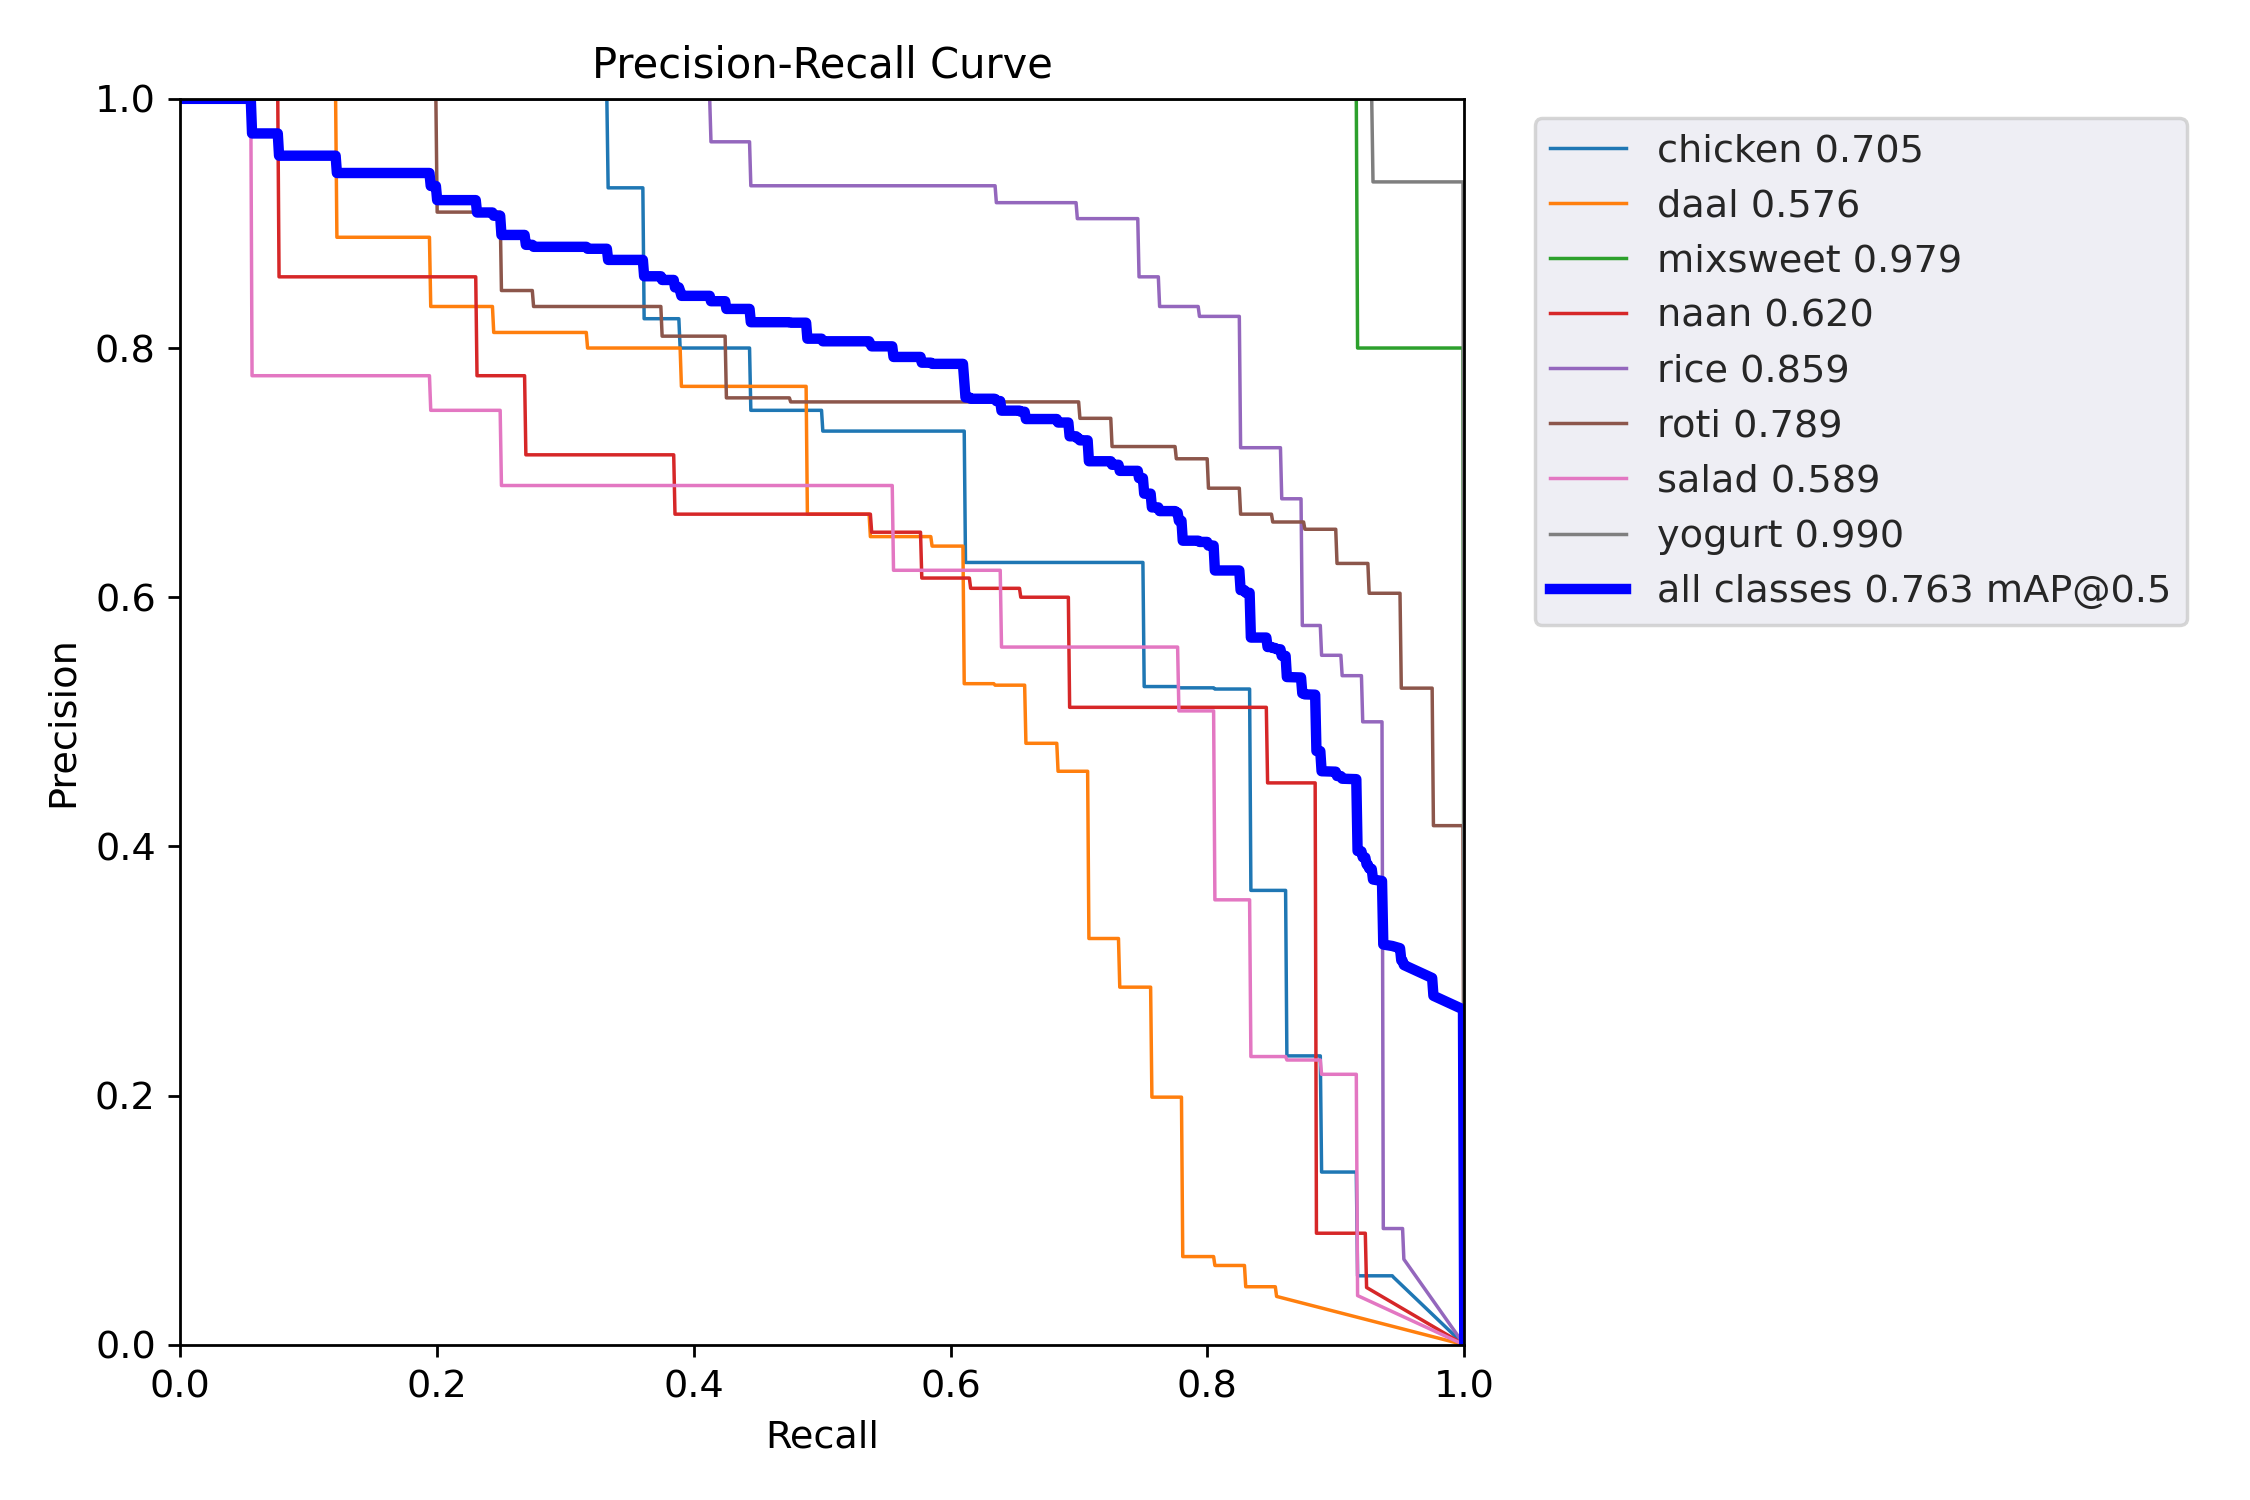

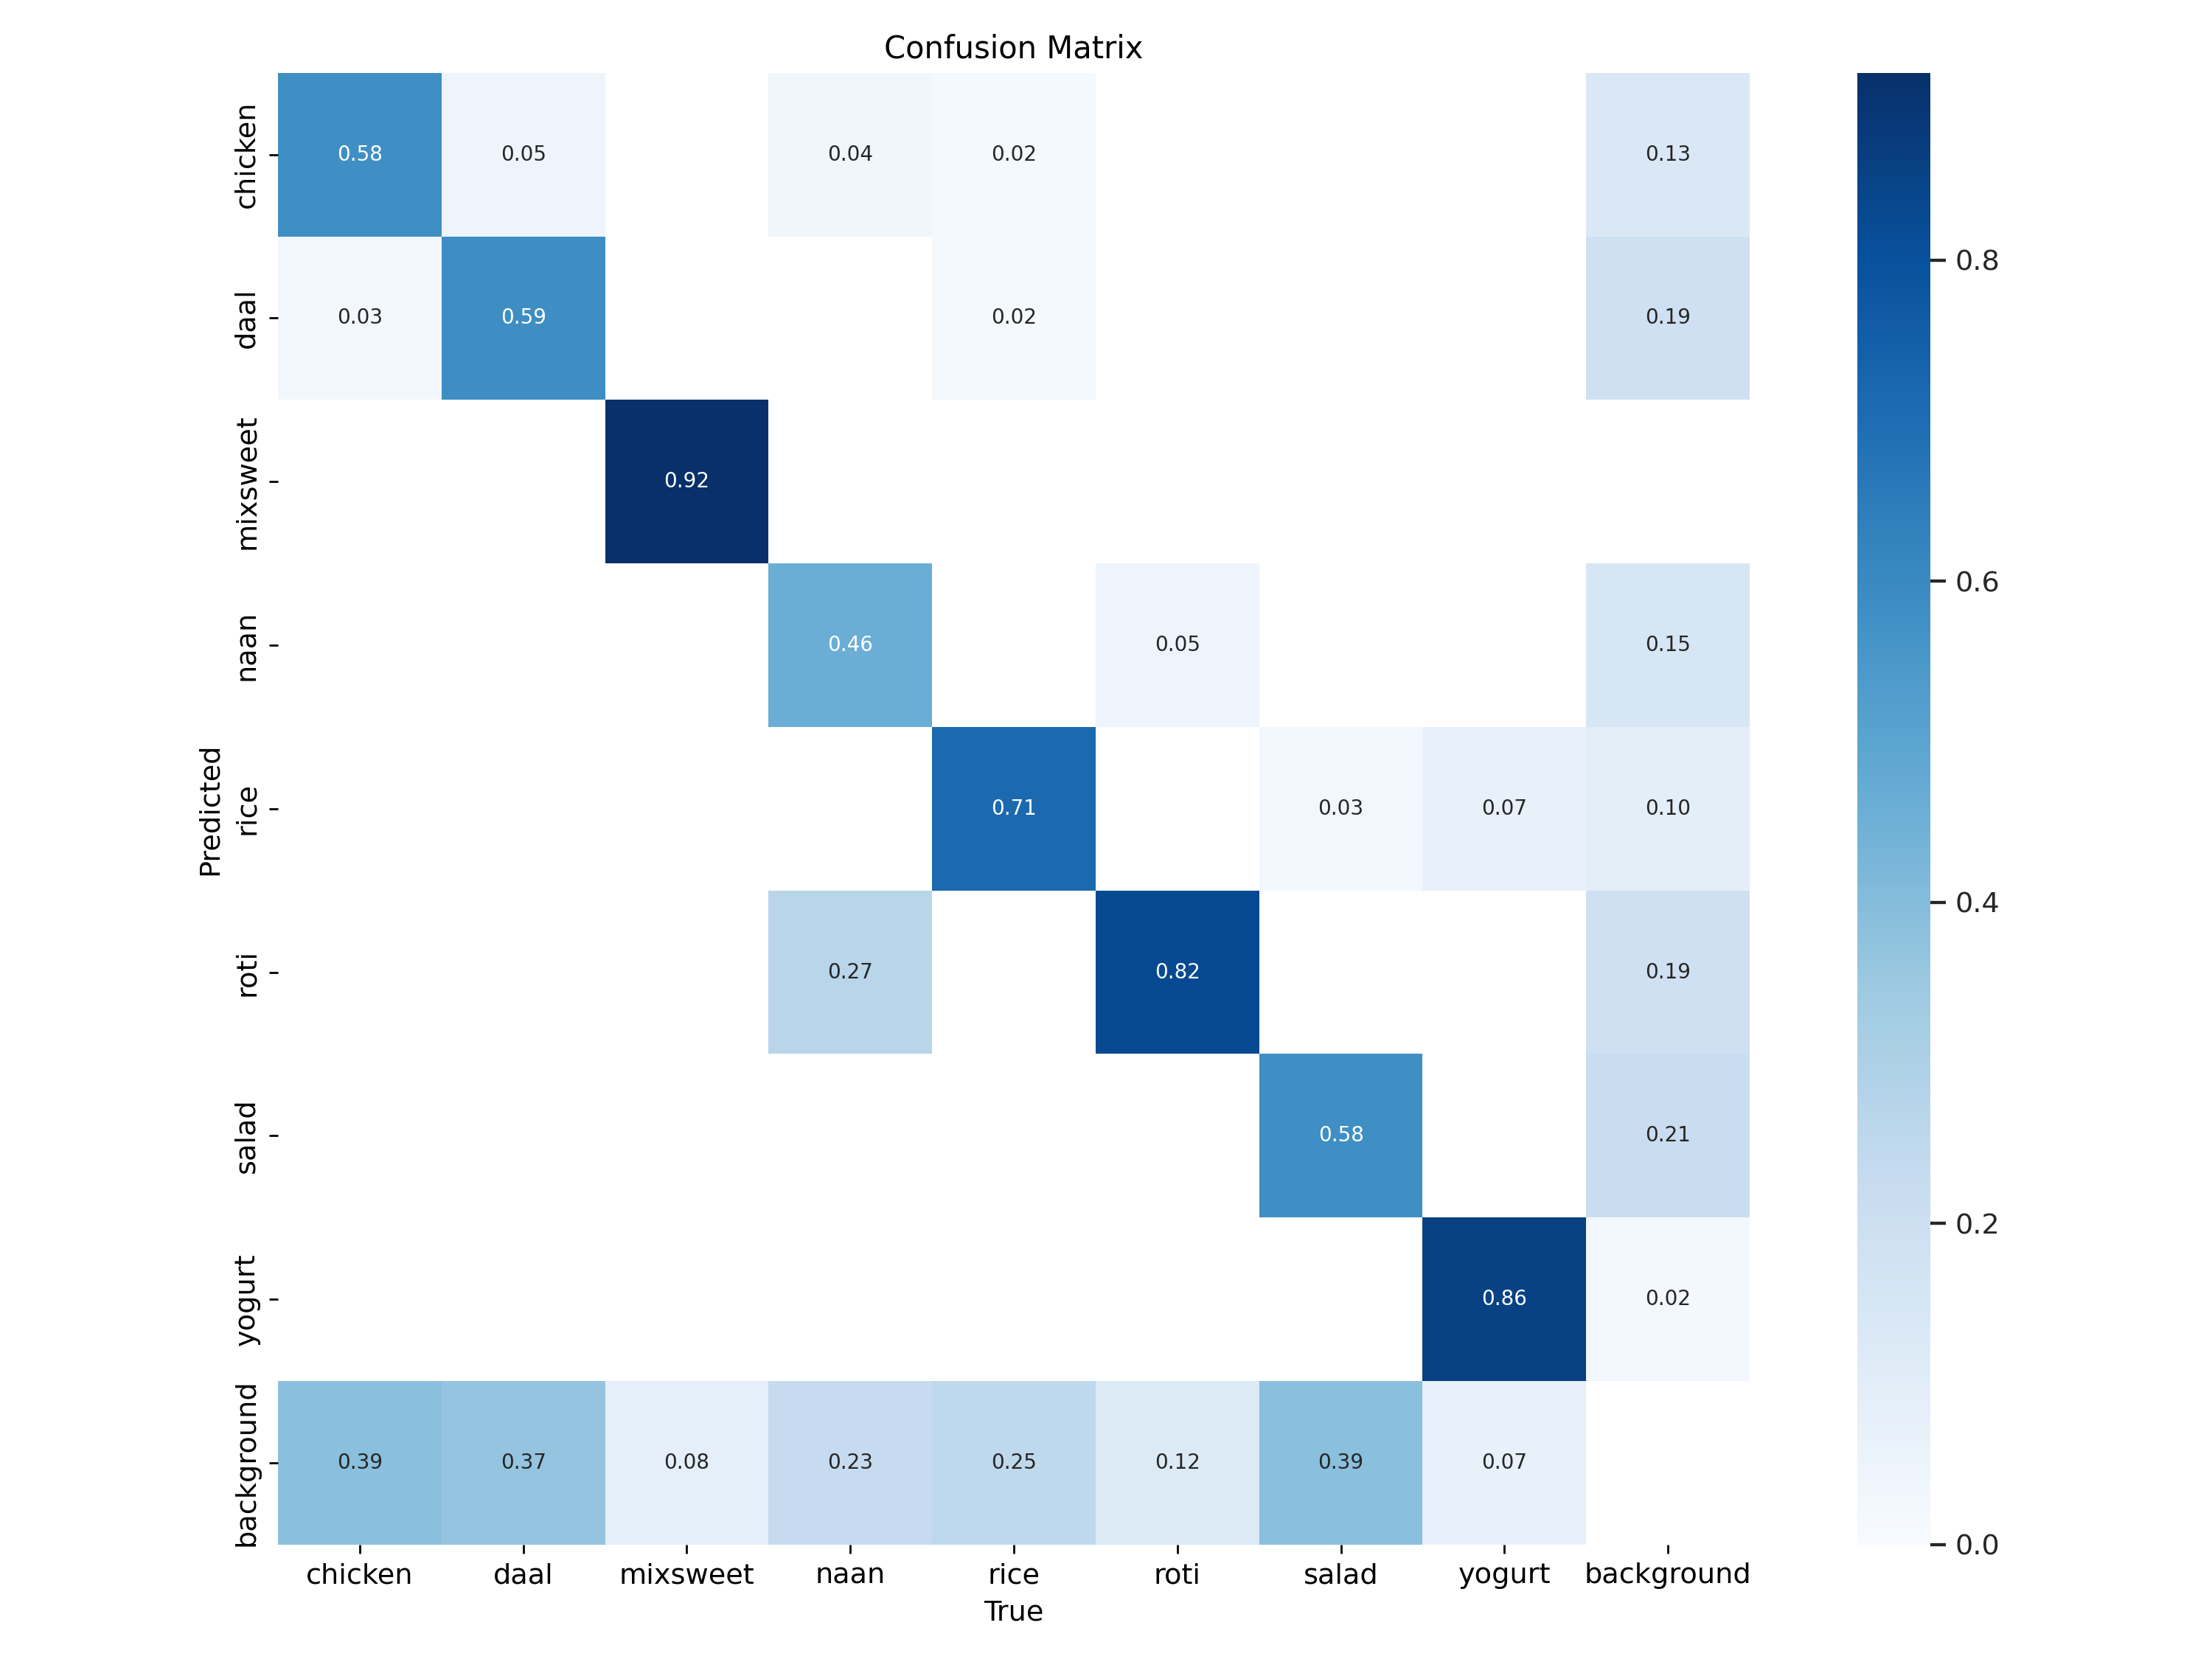

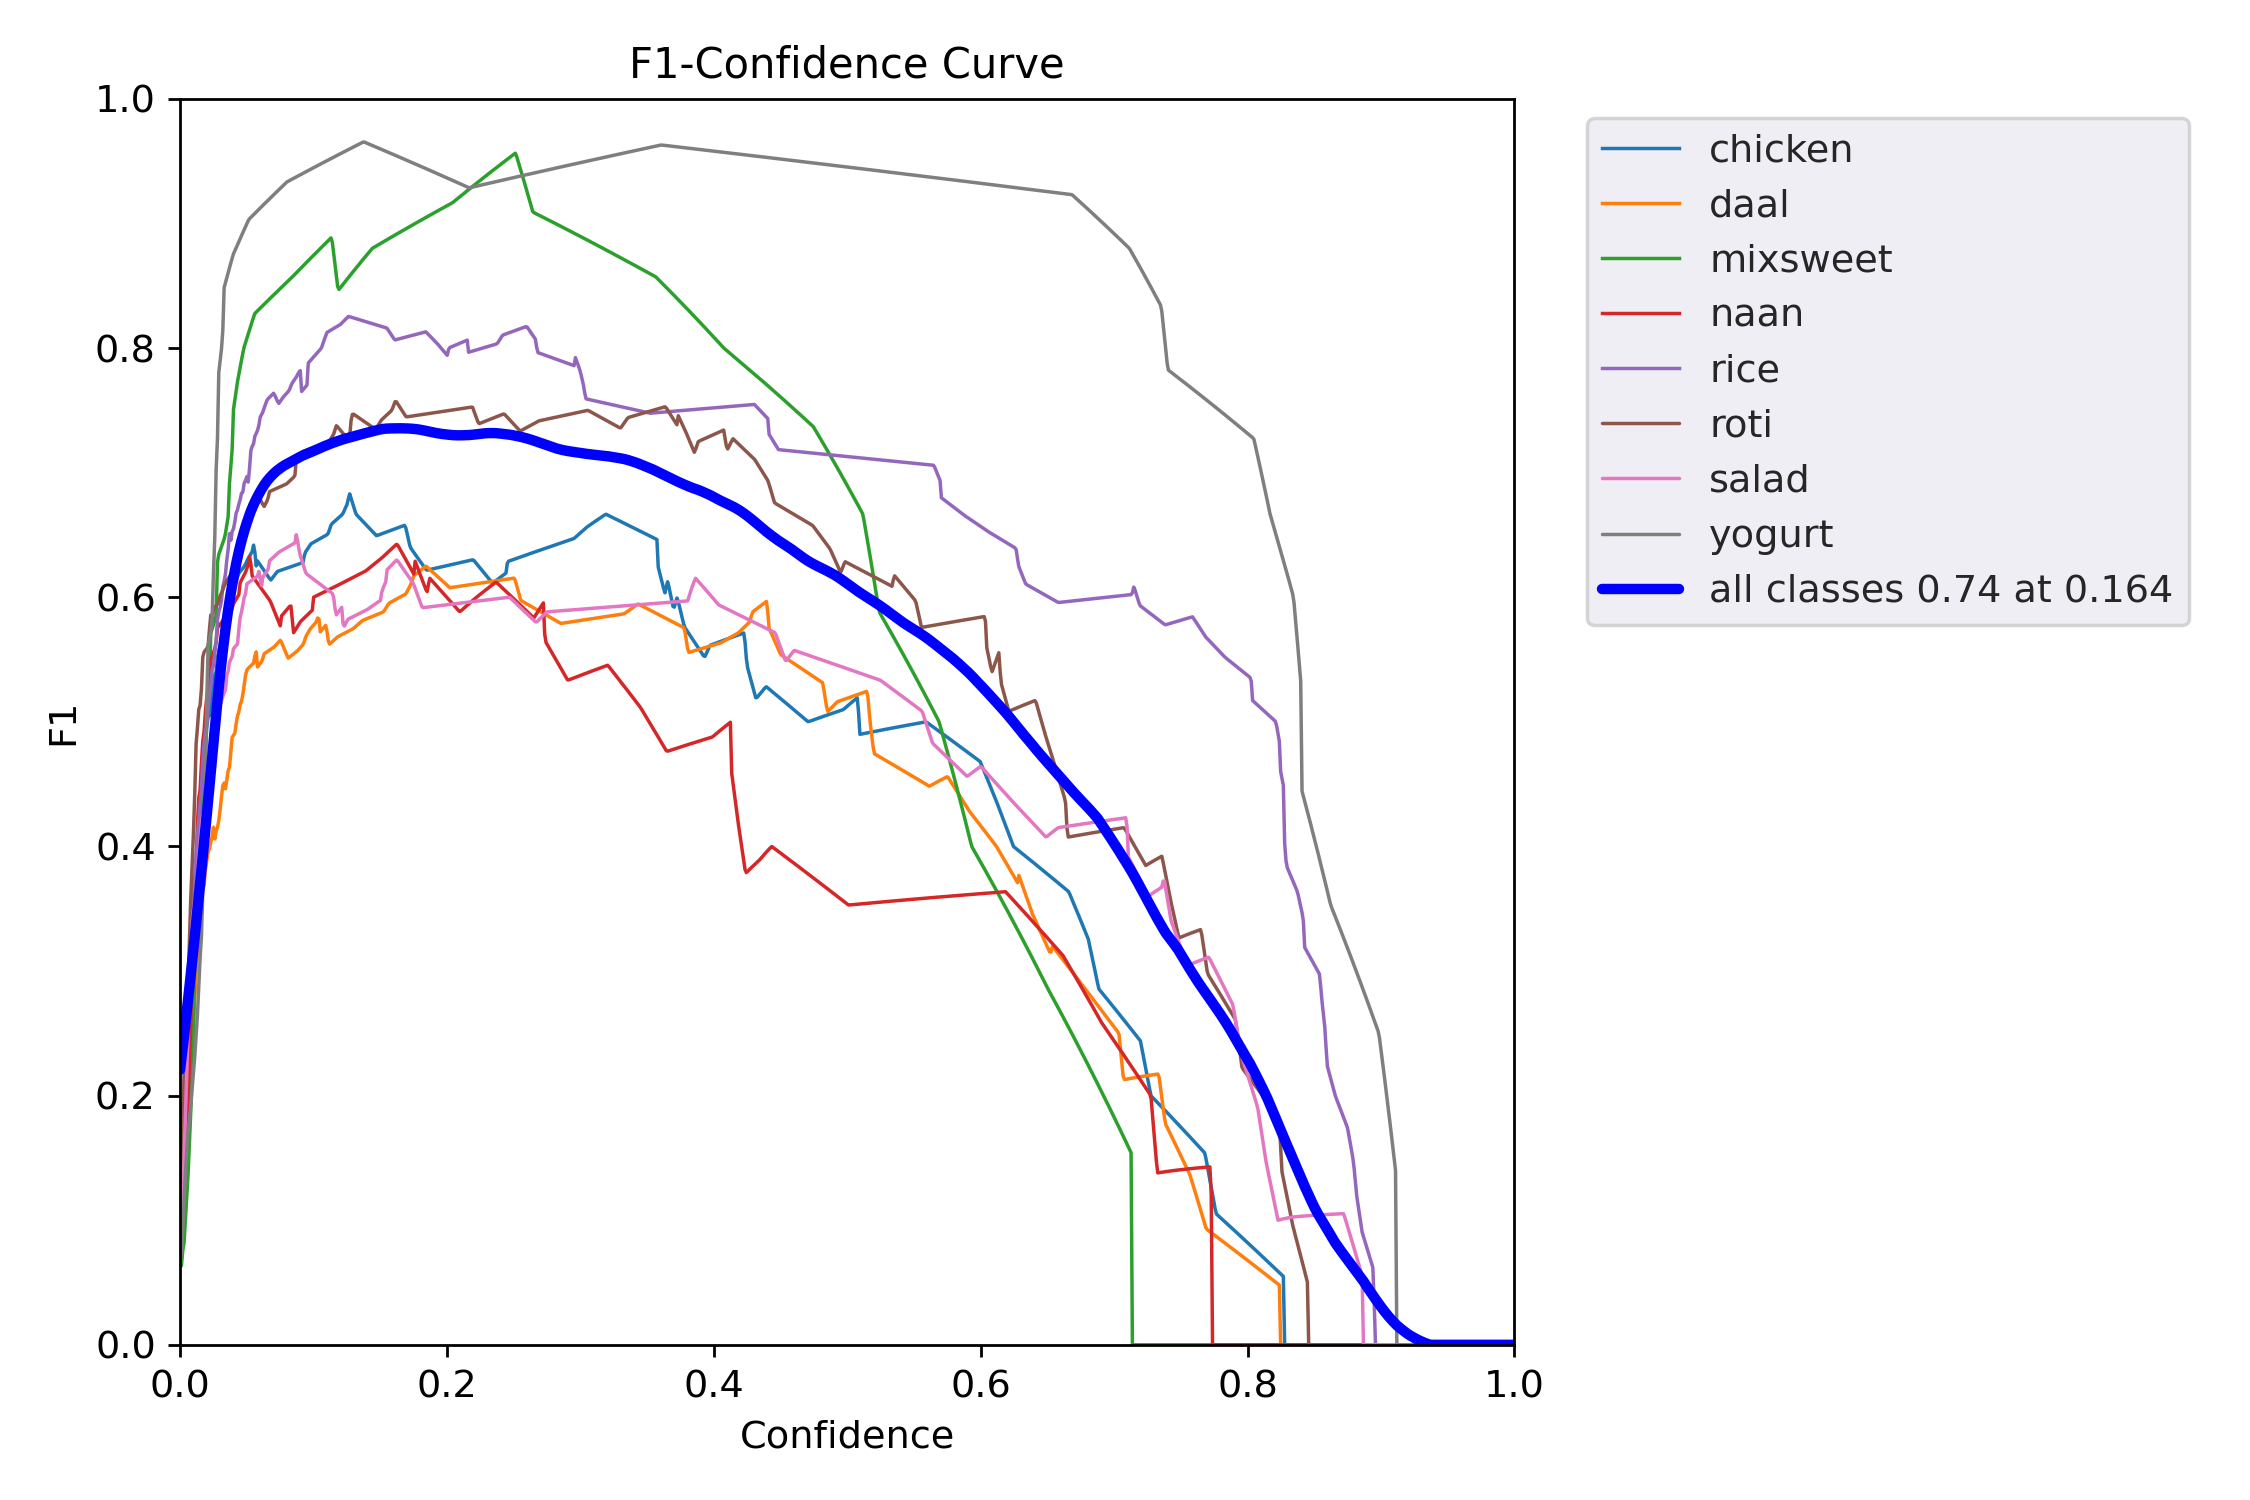

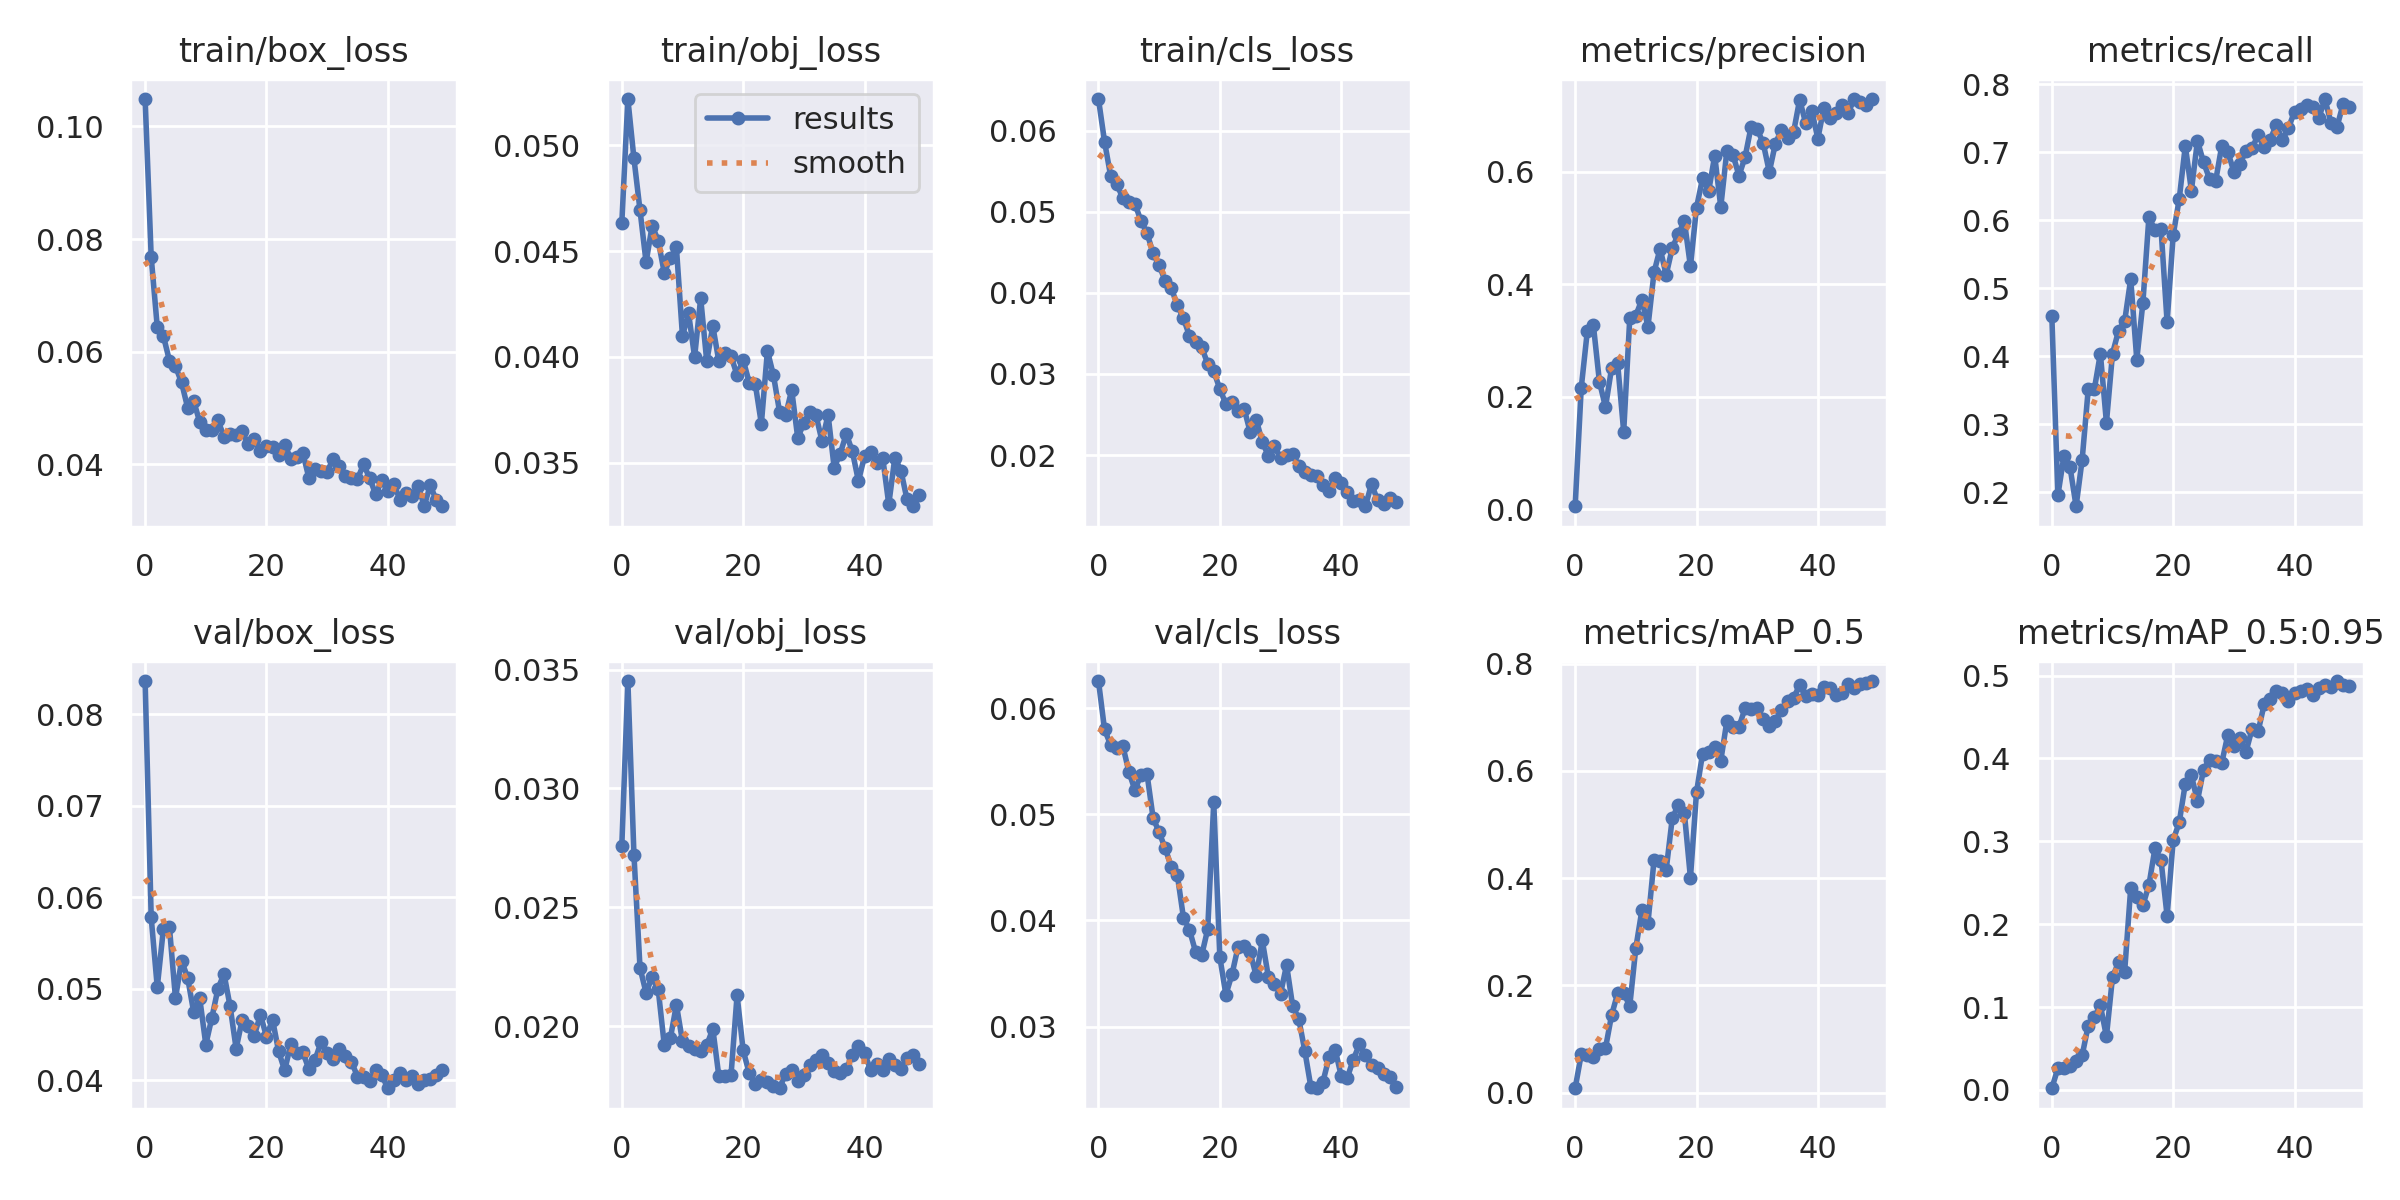

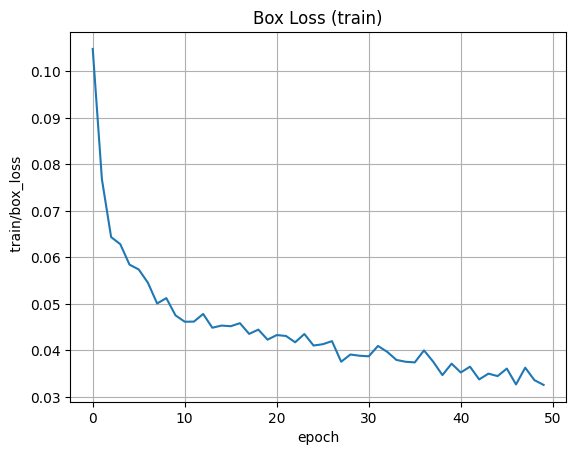

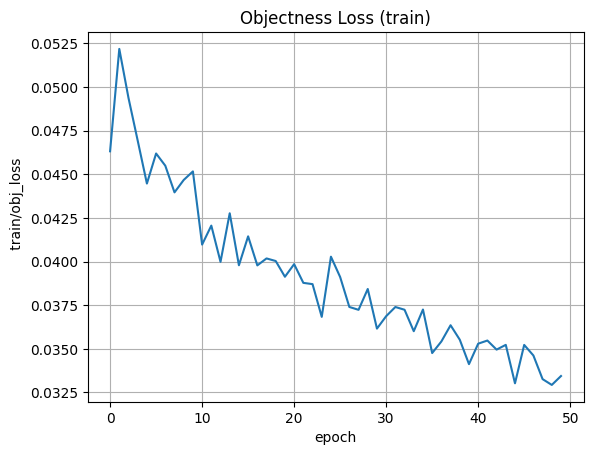

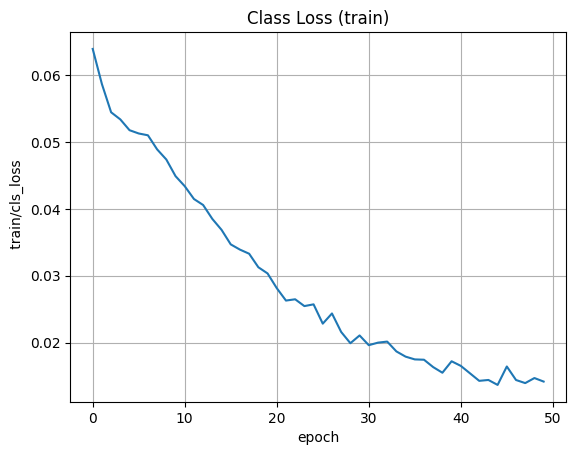

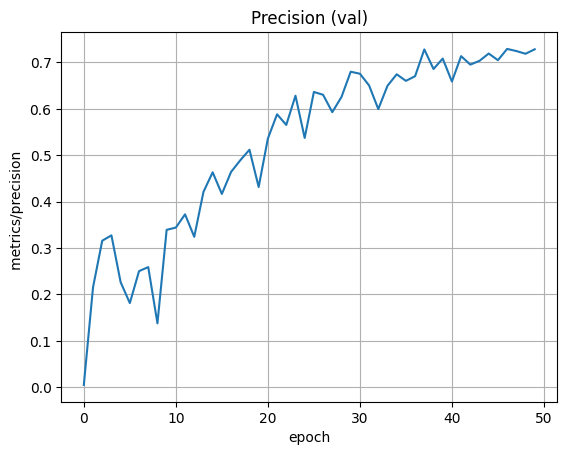

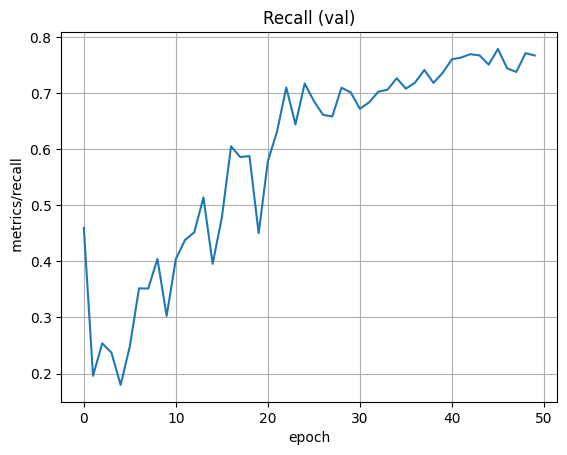

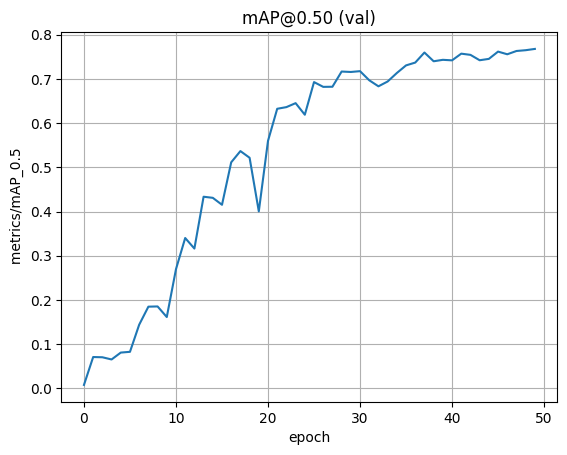

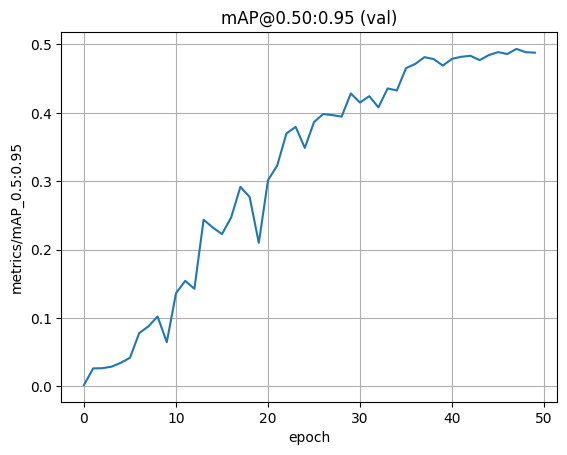

In [ ]:
# Robust monitor for YOLOv5 results.csv (works across versions)
import pandas as pd, glob, os
import matplotlib.pyplot as plt

runs = sorted(glob.glob('yolov5/runs/train/cs619_yolov5*'))
run_dir = runs[-1] if runs else None
print("Run dir:", run_dir)

def find_col(df, candidates):
    """Return the first column from candidates that exists in df, else None."""
    for c in candidates:
        if c in df.columns:
            return c
    # fallback: allow substring match
    for c in candidates:
        for col in df.columns:
            if c in col:
                return col
    return None

if run_dir:
    csv_path = os.path.join(run_dir, 'results.csv')
    if os.path.isfile(csv_path):
        df = pd.read_csv(csv_path)
        print("Columns:", list(df.columns))

        # Common names across YOLOv5 variants
        cols_to_plot = [
            (['train/box_loss', 'box_loss', 'loss/box'], 'Box Loss (train)'),
            (['train/obj_loss', 'obj_loss', 'loss/obj'], 'Objectness Loss (train)'),
            (['train/cls_loss', 'cls_loss', 'loss/cls'], 'Class Loss (train)'),
            (['metrics/precision', 'metrics/precision(B)', 'precision'], 'Precision (val)'),
            (['metrics/recall', 'metrics/recall(B)', 'recall'], 'Recall (val)'),
            (['metrics/mAP_0.5', 'metrics/mAP_0.5(B)', 'mAP_0.5', 'mAP@0.5'], 'mAP@0.50 (val)'),
            (['metrics/mAP_0.5:0.95', 'metrics/mAP_0.5:0.95(B)', 'mAP_0.5:0.95', 'mAP@0.5:0.95'], 'mAP@0.50:0.95 (val)'),
        ]

        for candidates, title in cols_to_plot:
            col = find_col(df, candidates)
            if col:
                plt.figure()
                plt.plot(df.index, df[col])
                plt.xlabel('epoch'); plt.ylabel(col)
                plt.title(title); plt.grid(True)
            else:
                print(f"Couldn’t find a column for: {title}")

        # Show PR/Confusion/F1/combined results images if present
        for img_name in ['PR_curve.png', 'confusion_matrix.png', 'F1_curve.png', 'results.png']:
            p = os.path.join(run_dir, img_name)
            if os.path.isfile(p):
                from IPython.display import Image, display
                display(Image(filename=p))
    else:
        print("results.csv not found")
else:
    print("No run directory found.")


###Validate on Test_Set and View sample predictions

/content/yolov5
val: data=/content/data/food_yolov5_data.yaml, weights=['/content/yolov5/runs/train/cs619_yolov5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=cs619_test_eval, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/Test_Set/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100% 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:02<00:00,  1.01it/s]
                   all         88        268      0.725      0.737      0.763      0.493
               chicken         88         36      0.613      0.

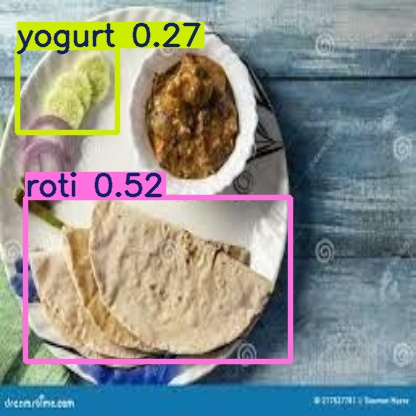

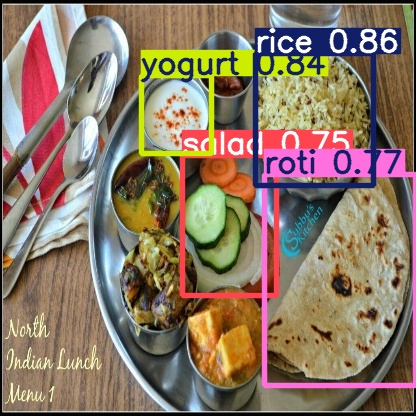

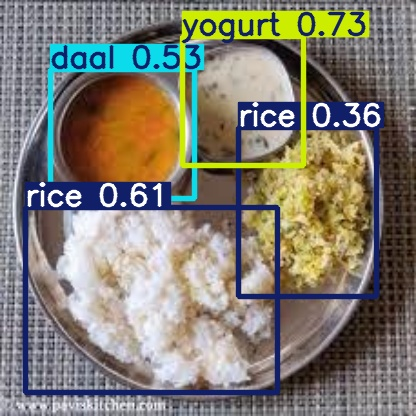

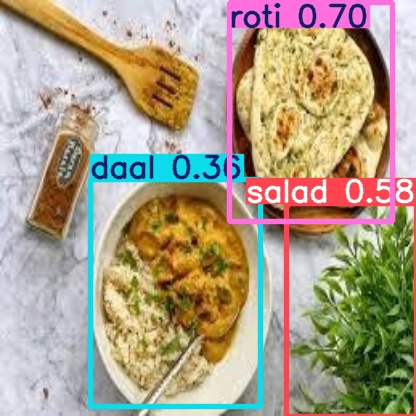

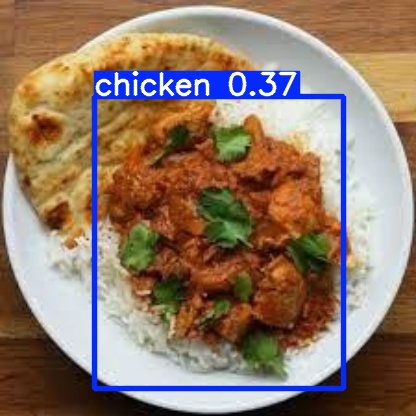

In [ ]:
# Validate best.pt on test split + run predictions on the whole Test_Set folder
import glob, os
from IPython.display import Image, display

runs = sorted(glob.glob('yolov5/runs/train/cs619_yolov5*'))
run_dir = runs[-1] if runs else None
assert run_dir, "Train first to create a run directory."
best_w = os.path.join(run_dir, 'weights', 'best.pt')
assert os.path.isfile(best_w), "best.pt not found; check training completed."

%cd yolov5

# 1) Full test evaluation (already good in your logs)
!python val.py --weights "{best_w}" --data "data/food_yolov5_data.yaml" --img 640 --task test --name cs619_test_eval

# 2) Predictions: use the directory as the source (not multiple filenames)
!python detect.py --weights "{best_w}" --source "Test_Set/images" --img 640 --name cs619_test_preds --save-txt --save-conf

# Show a few saved prediction images
pred_dir_candidates = sorted(glob.glob('yolov5/runs/detect/cs619_test_preds*'))
assert pred_dir_candidates, "No prediction output folder found. Check detect.py run."
pred_dir = pred_dir_candidates[-1]
print("Predictions folder:", pred_dir)

shown = 0
for p in glob.glob(os.path.join(pred_dir, '*.*')):
    if p.lower().endswith(('.jpg','.jpeg','.png')):
        display(Image(filename=p))
        shown += 1
        if shown >= 5:
            break
if shown == 0:
    print("No images previewed — check that Test_Set/images contains .jpg/.png files.")


# Show confusion matrix, PR curve, F1 curve



Validation run dir: /content/yolov5/runs/val/cs619_test_eval


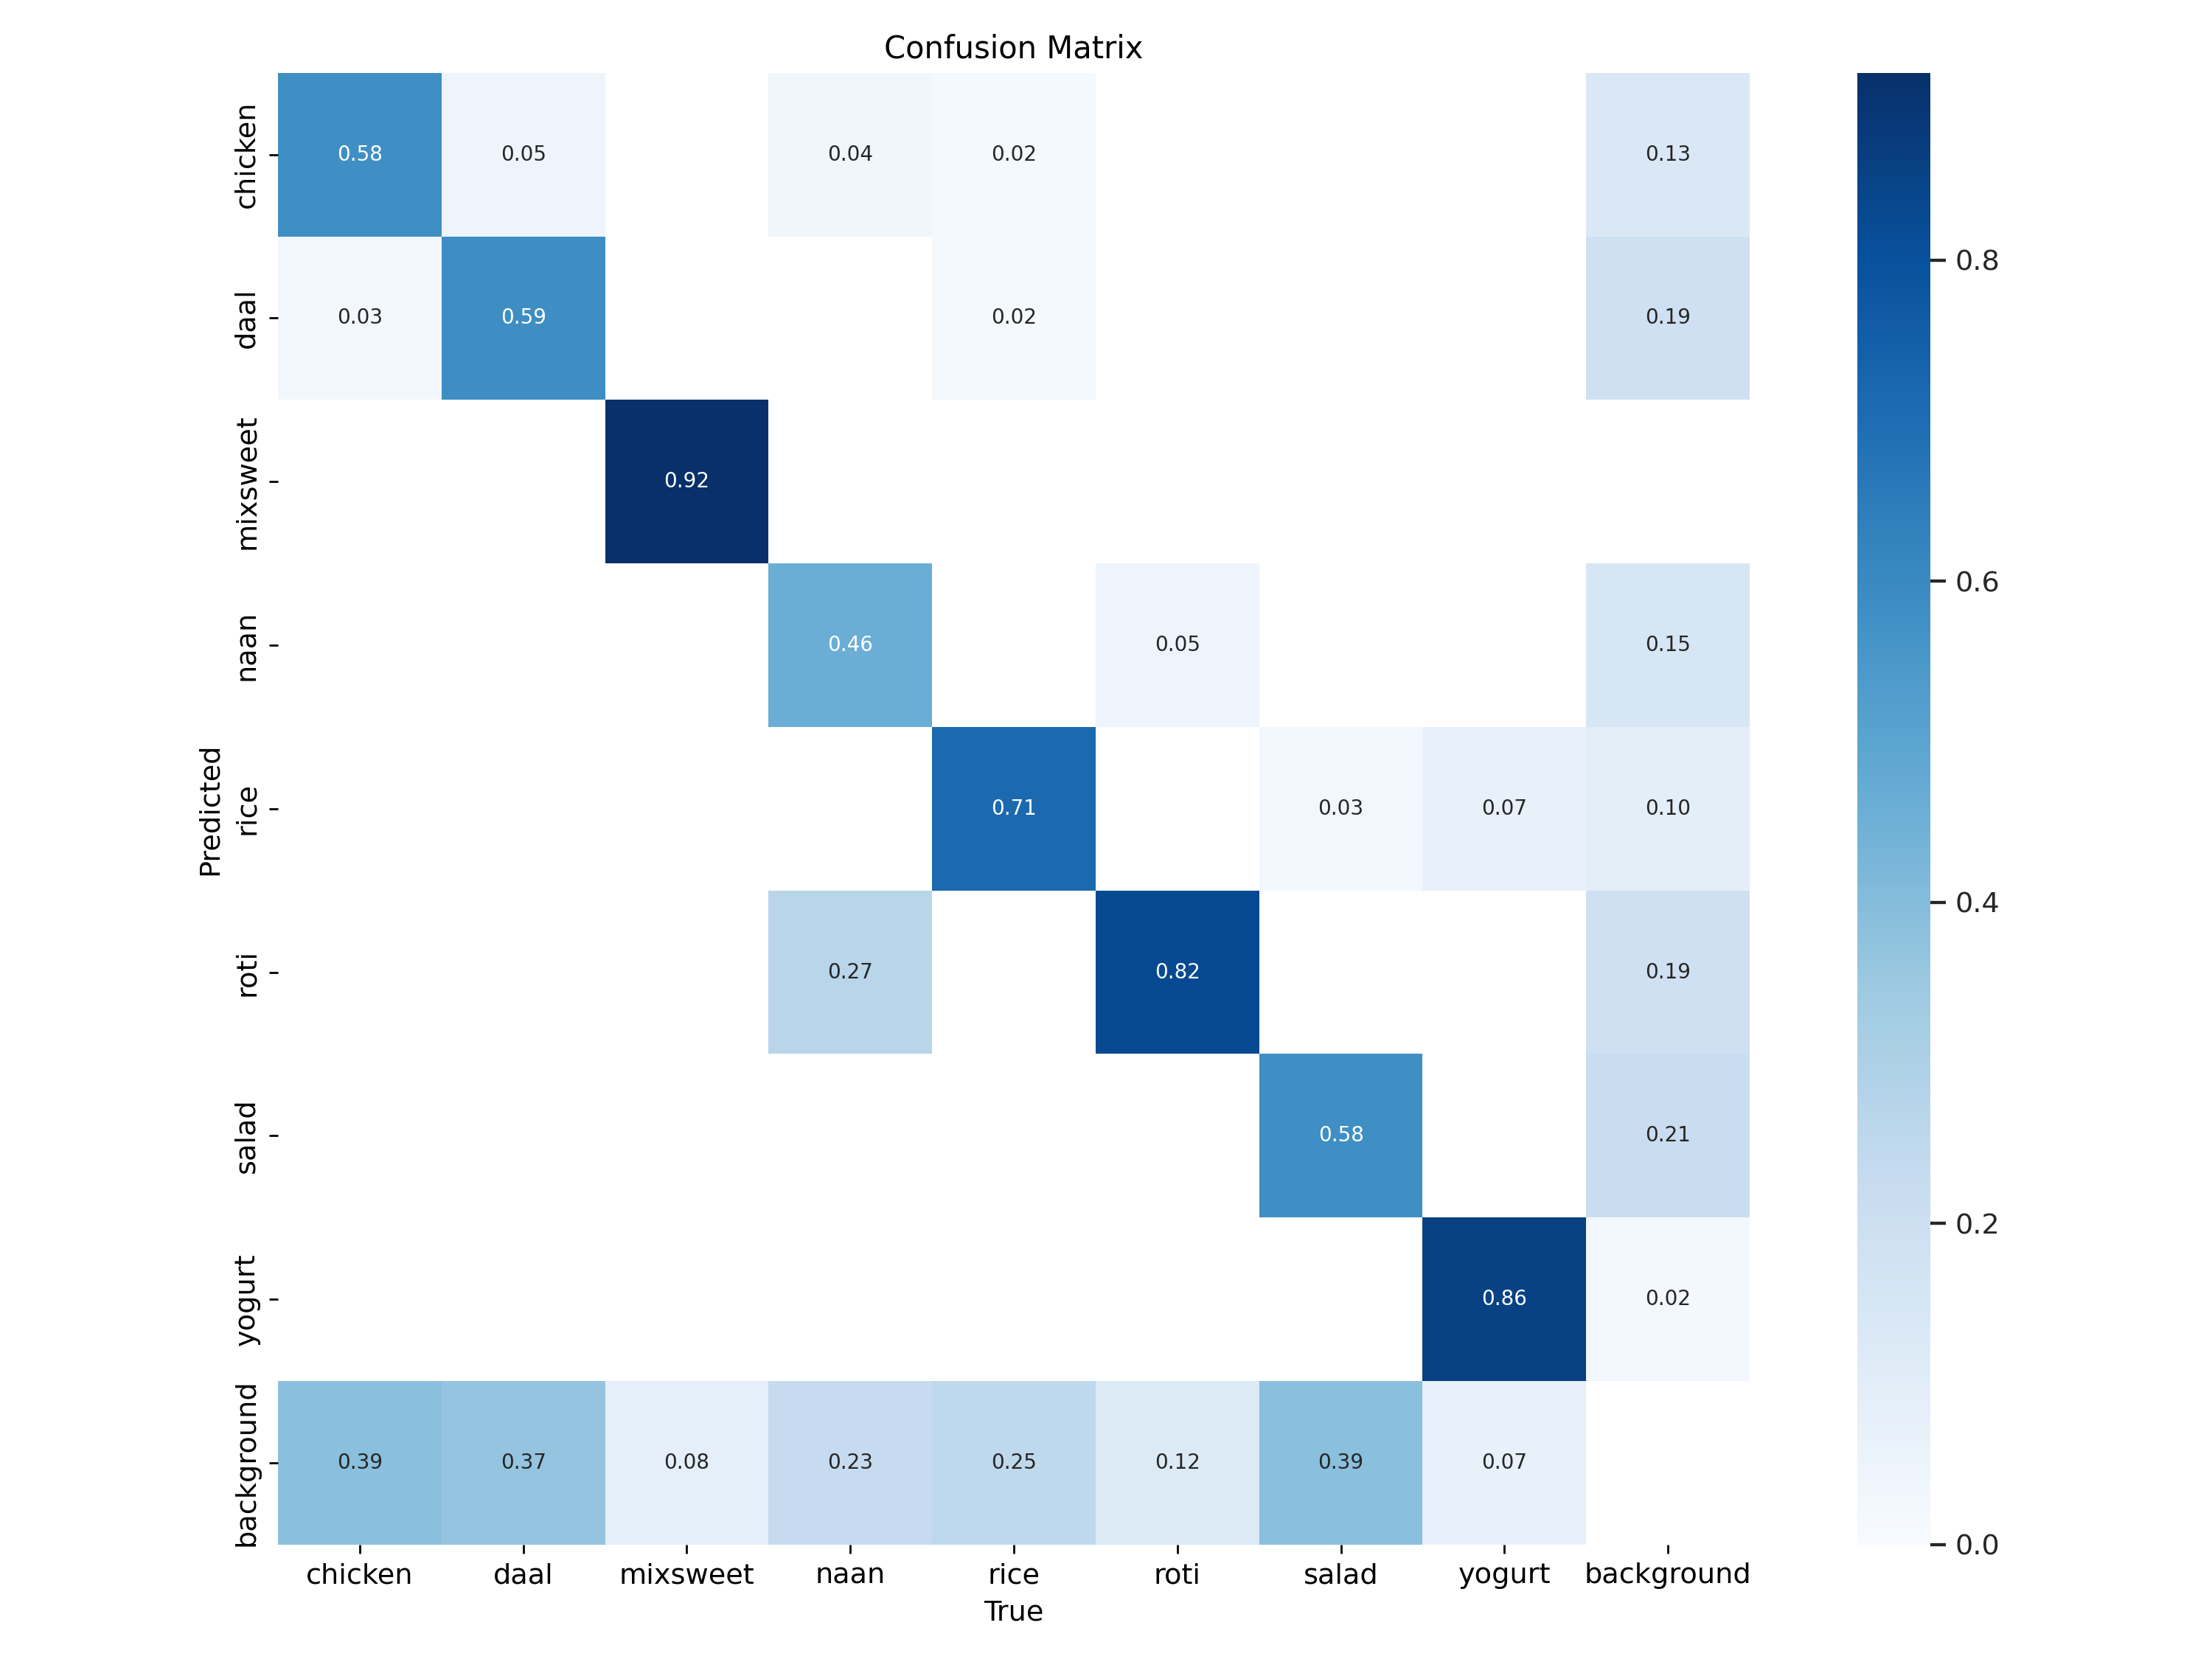

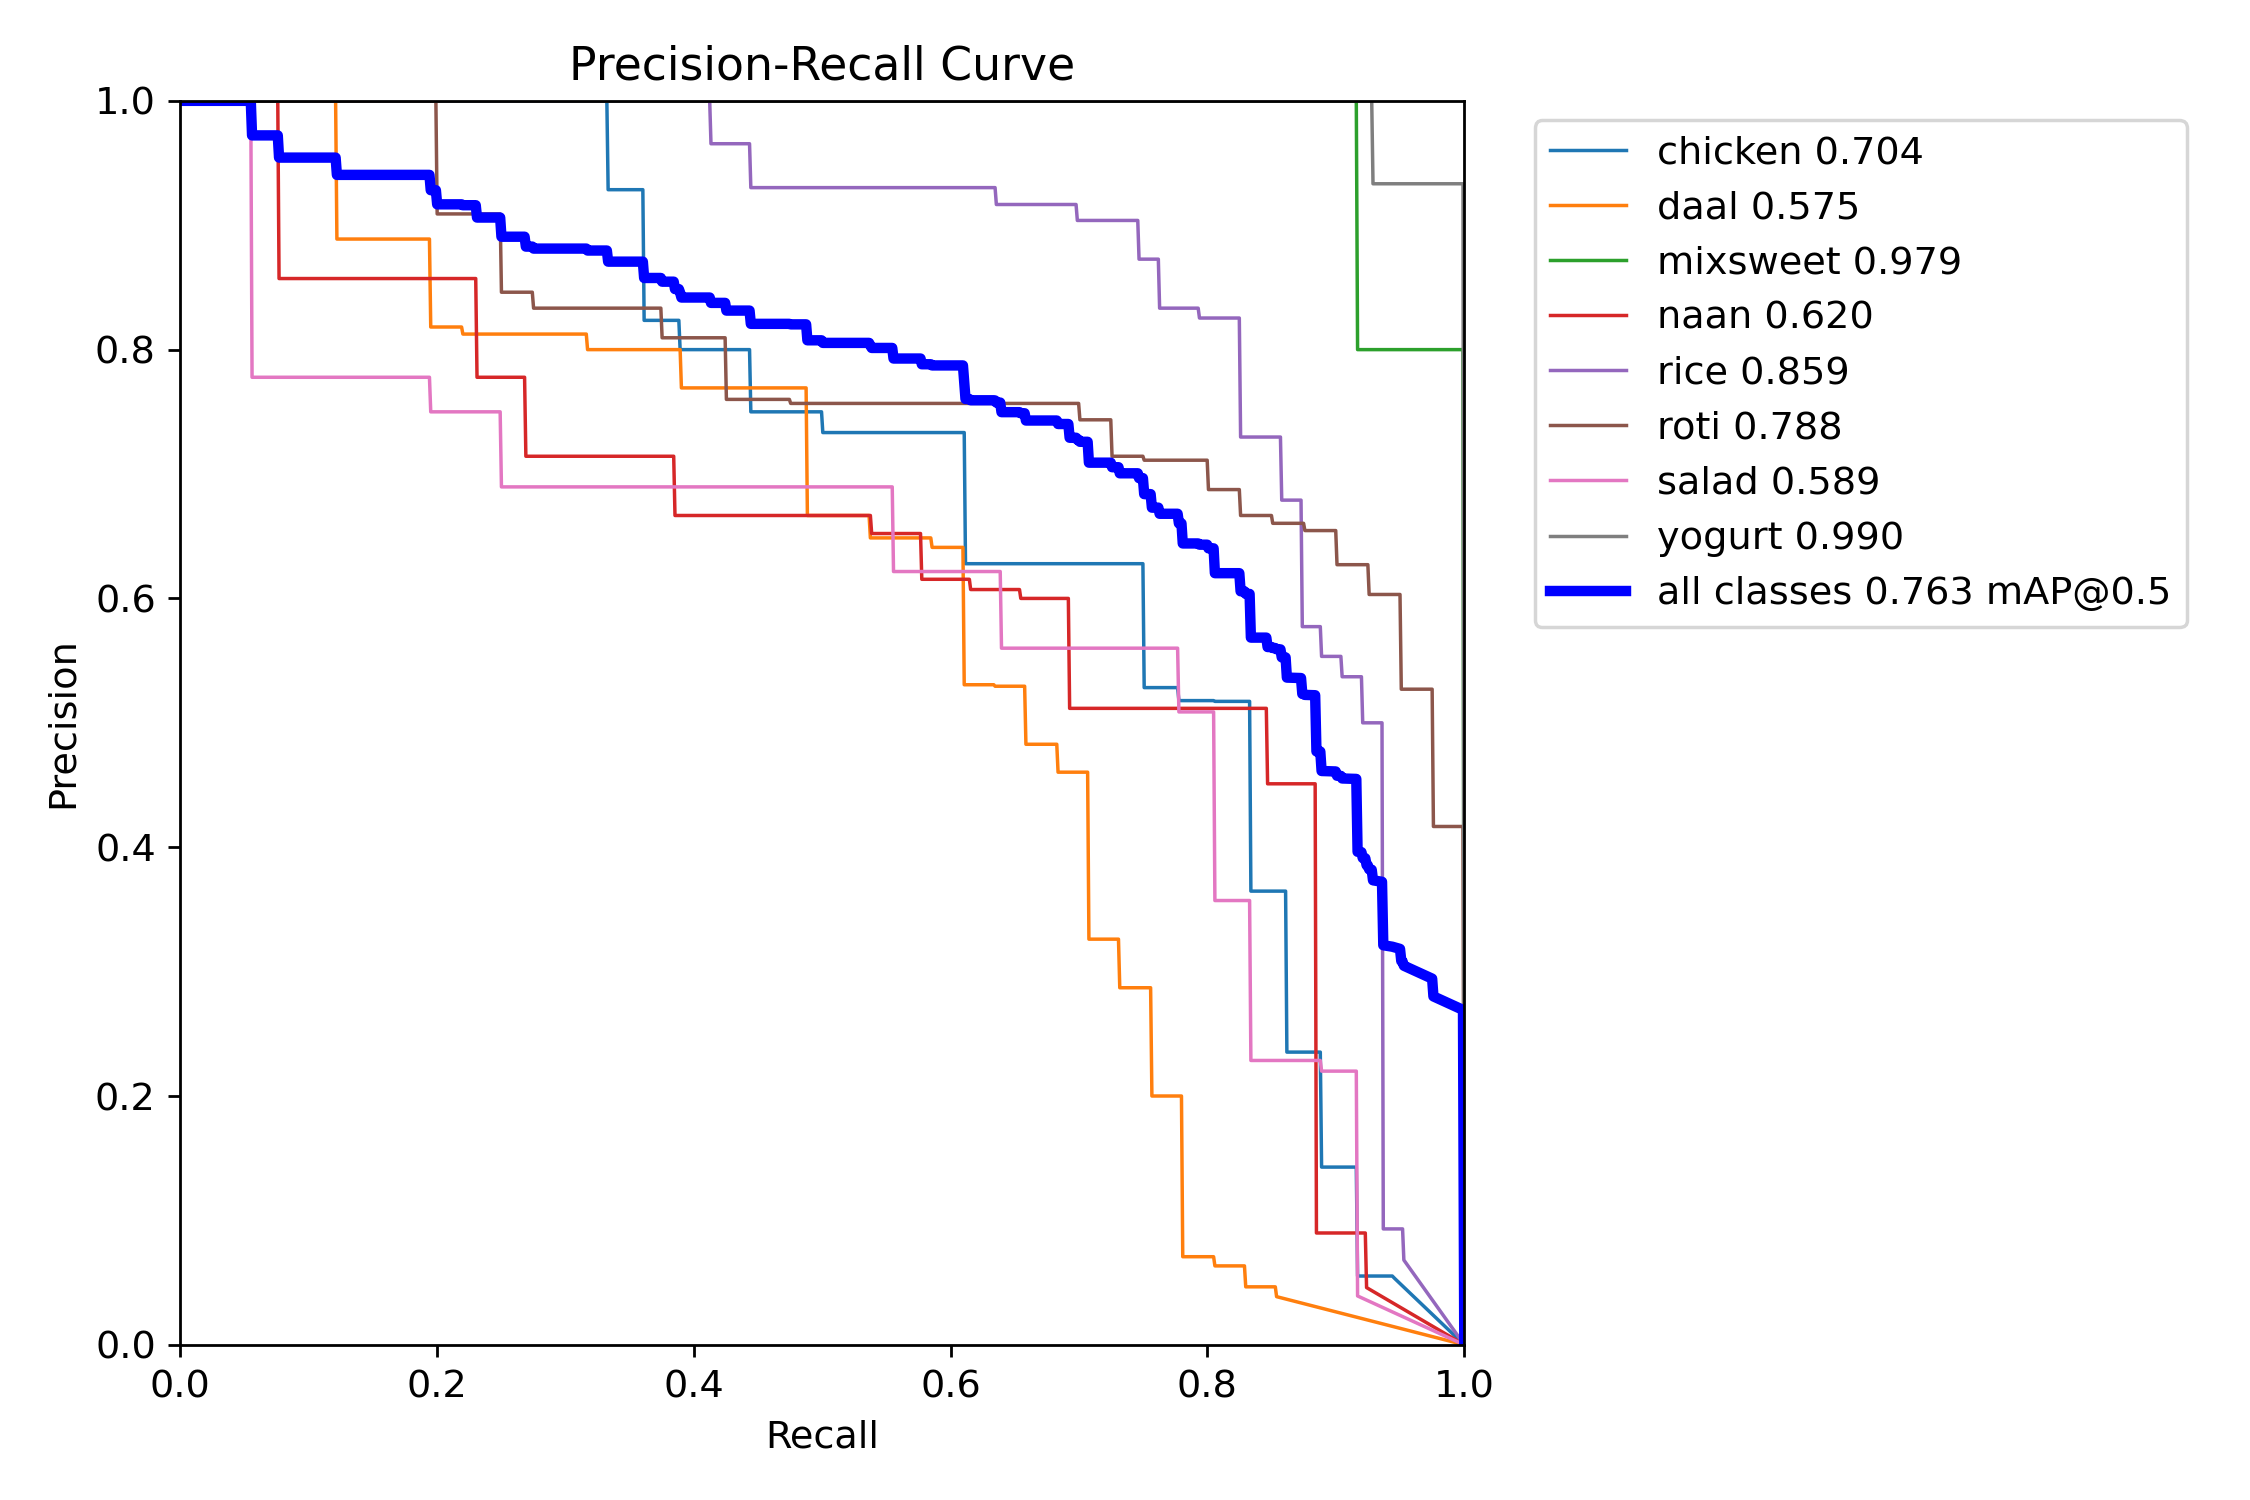

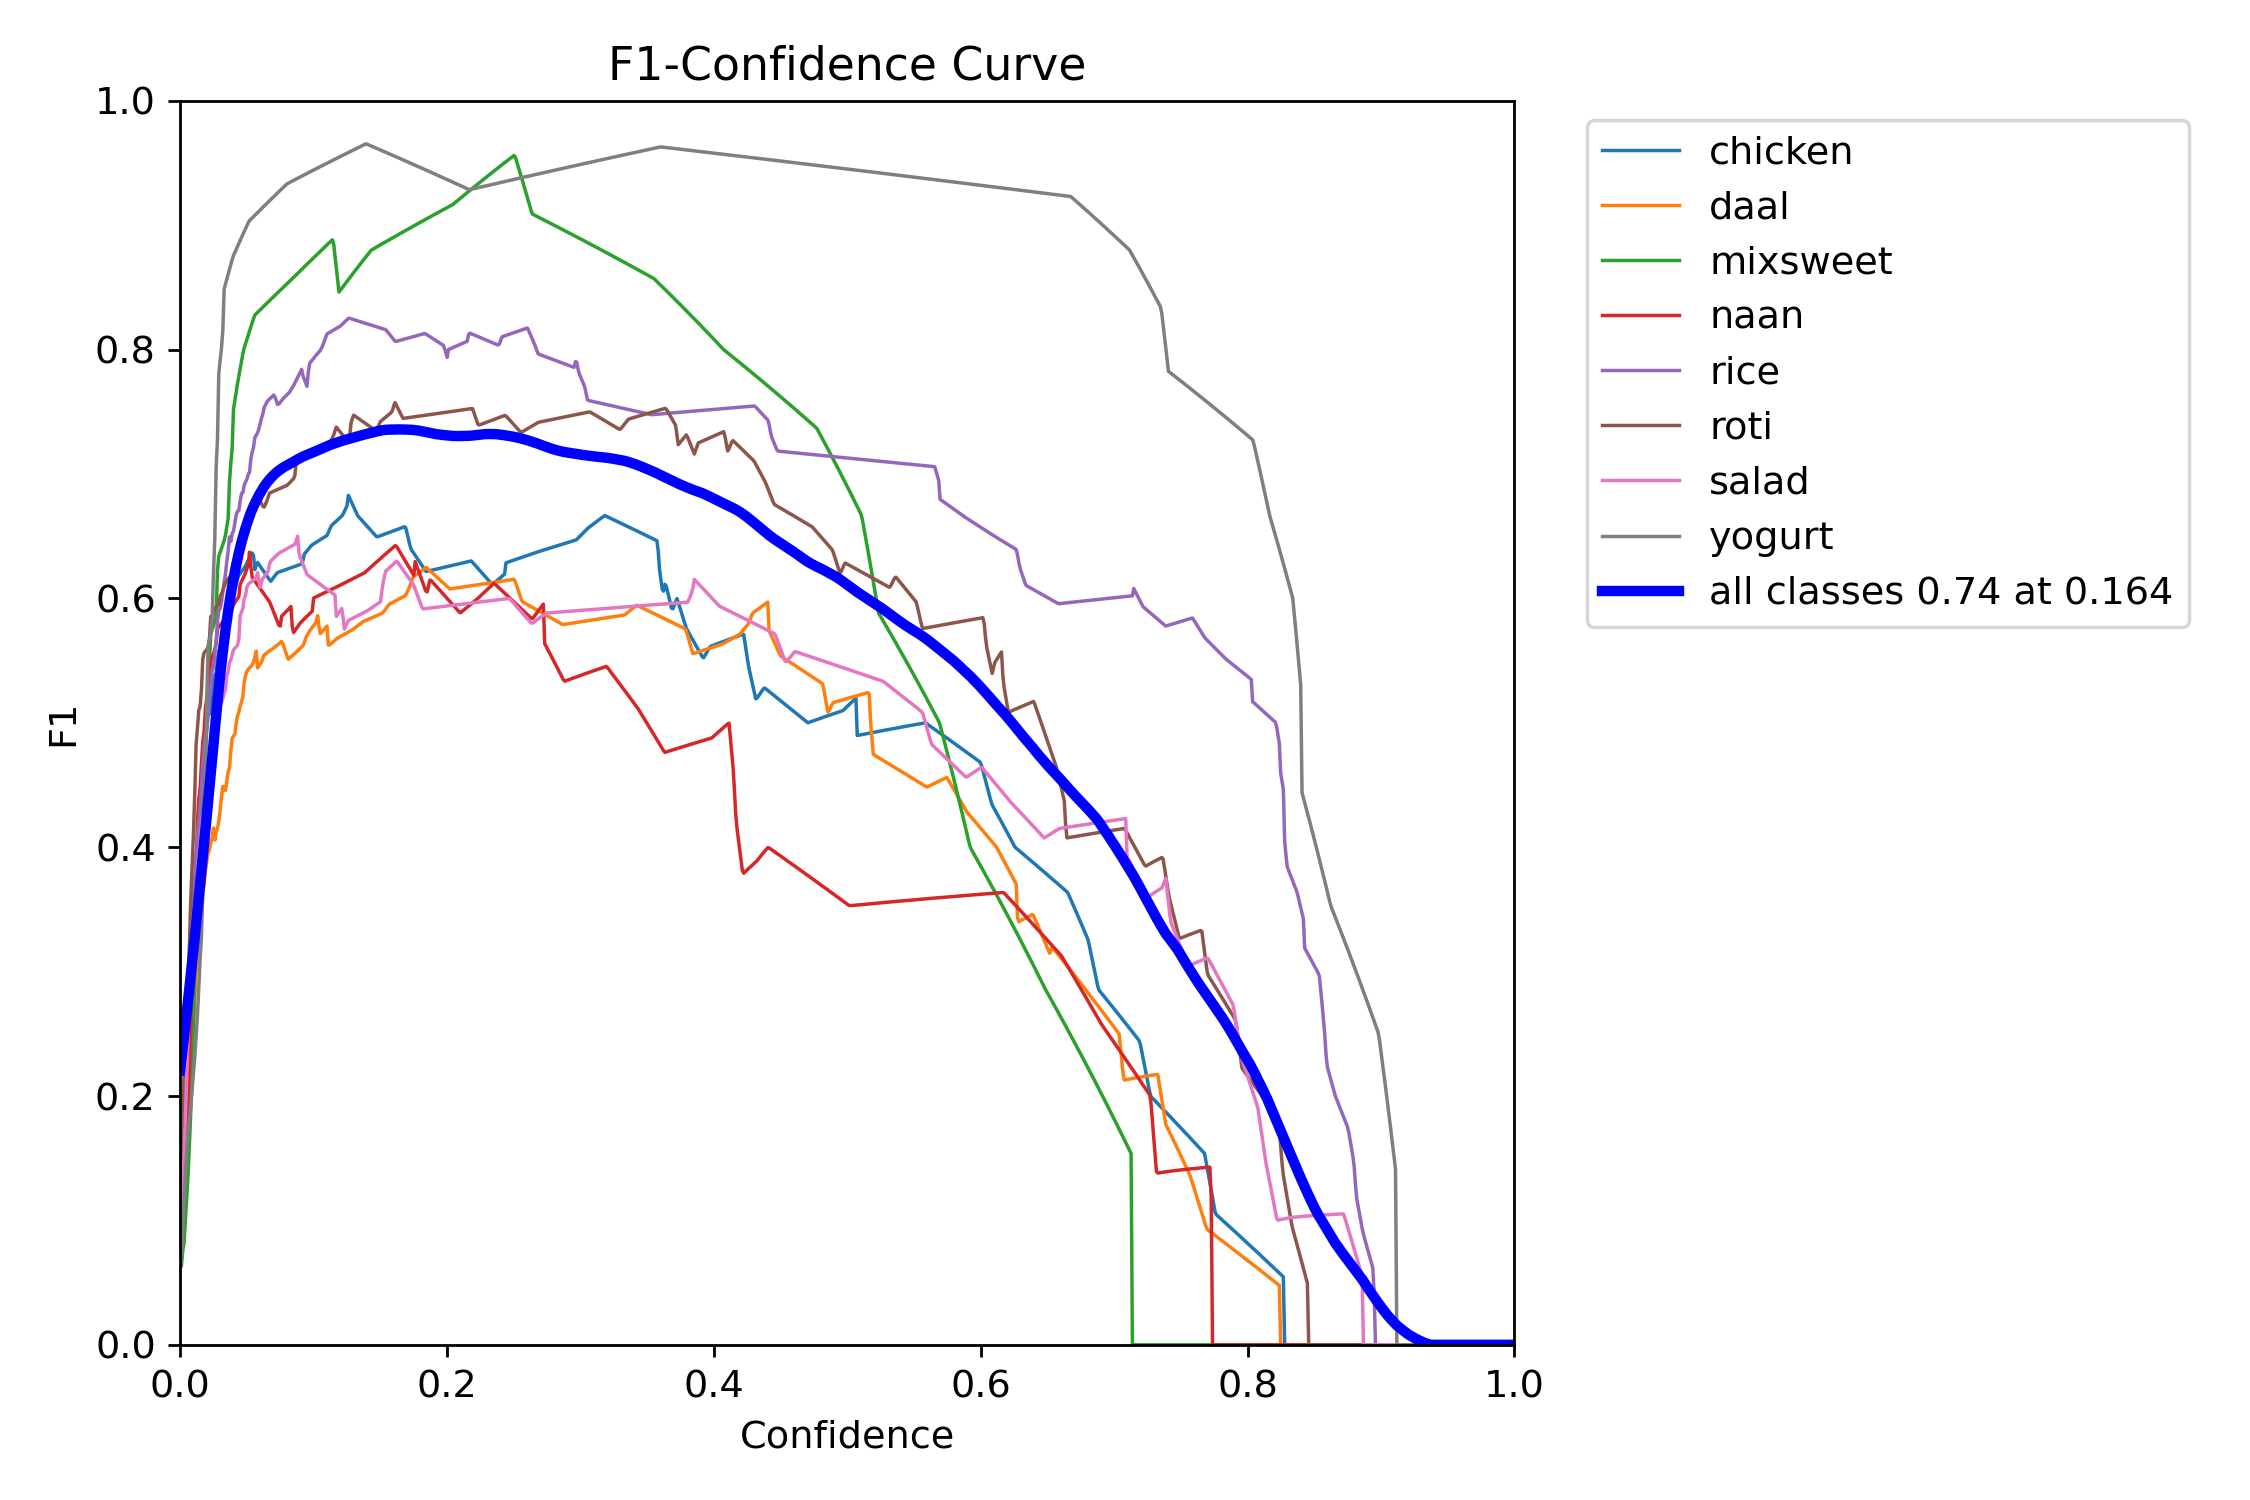

In [ ]:
val_dir_candidates = sorted(glob.glob('yolov5/runs/val/cs619_test_eval*'))
val_dir = val_dir_candidates[-1] if val_dir_candidates else None
print("Validation run dir:", val_dir)

if val_dir:
    for img_name in ['confusion_matrix.png', 'PR_curve.png', 'F1_curve.png']:
        p = os.path.join(val_dir, img_name)
        if os.path.isfile(p):
            display(Image(filename=p))

# Predictions vs ground truth

Prediction results in: /content/yolov5/runs/detect/cs619_test_preds


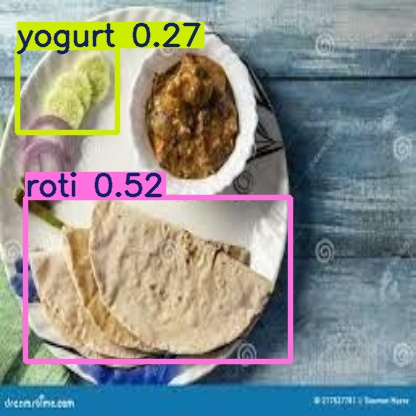

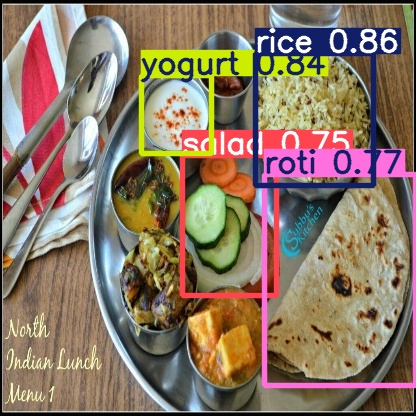

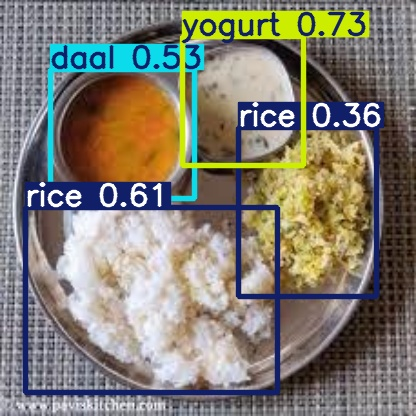

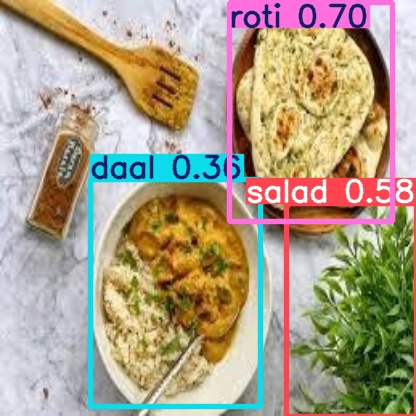

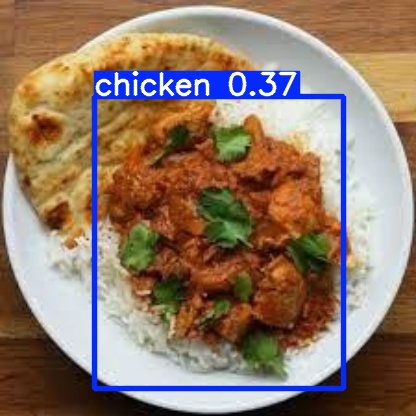

In [ ]:
pred_dir = sorted(glob.glob('yolov5/runs/detect/cs619_test_preds*'))[-1]
print("Prediction results in:", pred_dir)

imgs = glob.glob(os.path.join(pred_dir, '*.jpg')) + glob.glob(os.path.join(pred_dir, '*.png'))
for p in imgs[:5]:
    display(Image(filename=p))

#Fine-Tuning

In [ ]:
!cp data/hyps/hyp.scratch-low.yaml hyp_ft.yaml

import yaml
hyp_path = 'hyp_ft.yaml'
with open(hyp_path) as f:
    hyp = yaml.safe_load(f)

hyp['lr0'] = 0.001
hyp['flipud'] = 0.5
hyp['degrees'] = 15

with open(hyp_path, 'w') as f:
    yaml.safe_dump(hyp, f)

print("✅ Fine-tuning hyp.yaml written")
print(yaml.safe_dump(hyp, sort_keys=False))

✅ Fine-tuning hyp.yaml written
lr0: 0.001
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1
box: 0.05
cls: 0.5
cls_pw: 1.0
obj: 1.0
obj_pw: 1.0
iou_t: 0.2
anchor_t: 4.0
fl_gamma: 0.0
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 15
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.5
fliplr: 0.5
mosaic: 1.0
mixup: 0.0
copy_paste: 0.0



# Fine-tune Training

In [ ]:
EPOCHS_FT = 70
BATCH_SIZE = 14


%cd yolov5
!python train.py --img 640 --batch {BATCH_SIZE} --epochs {EPOCHS_FT} --data {DATA_YAML_PATH} --weights {MODEL_WEIGHTS} --hyp {hyp_path}  --name cs619_yolov5_finetuned --exist-ok


# The run artifacts will be in yolov5/runs/train/cs619_yolov5_finetuned*

/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-09-12 06:08:07.198741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757657287.220217    7045 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757657287.226582    7045 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757657287.243335    7045 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757657287.243362    7045 computation_placer.cc:177] computation placer a

# Evaluate fine-tuned model


val: data=/content/data/food_yolov5_data.yaml, weights=['/content/yolov5/runs/train/cs619_yolov5_finetuned/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=cs619_eval_ft, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/Test_Set/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100% 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:03<00:00,  1.01s/it]
                   all         88        268      0.417      0.539      0.444       0.25
               chicken         88         36      0.249        0.5     

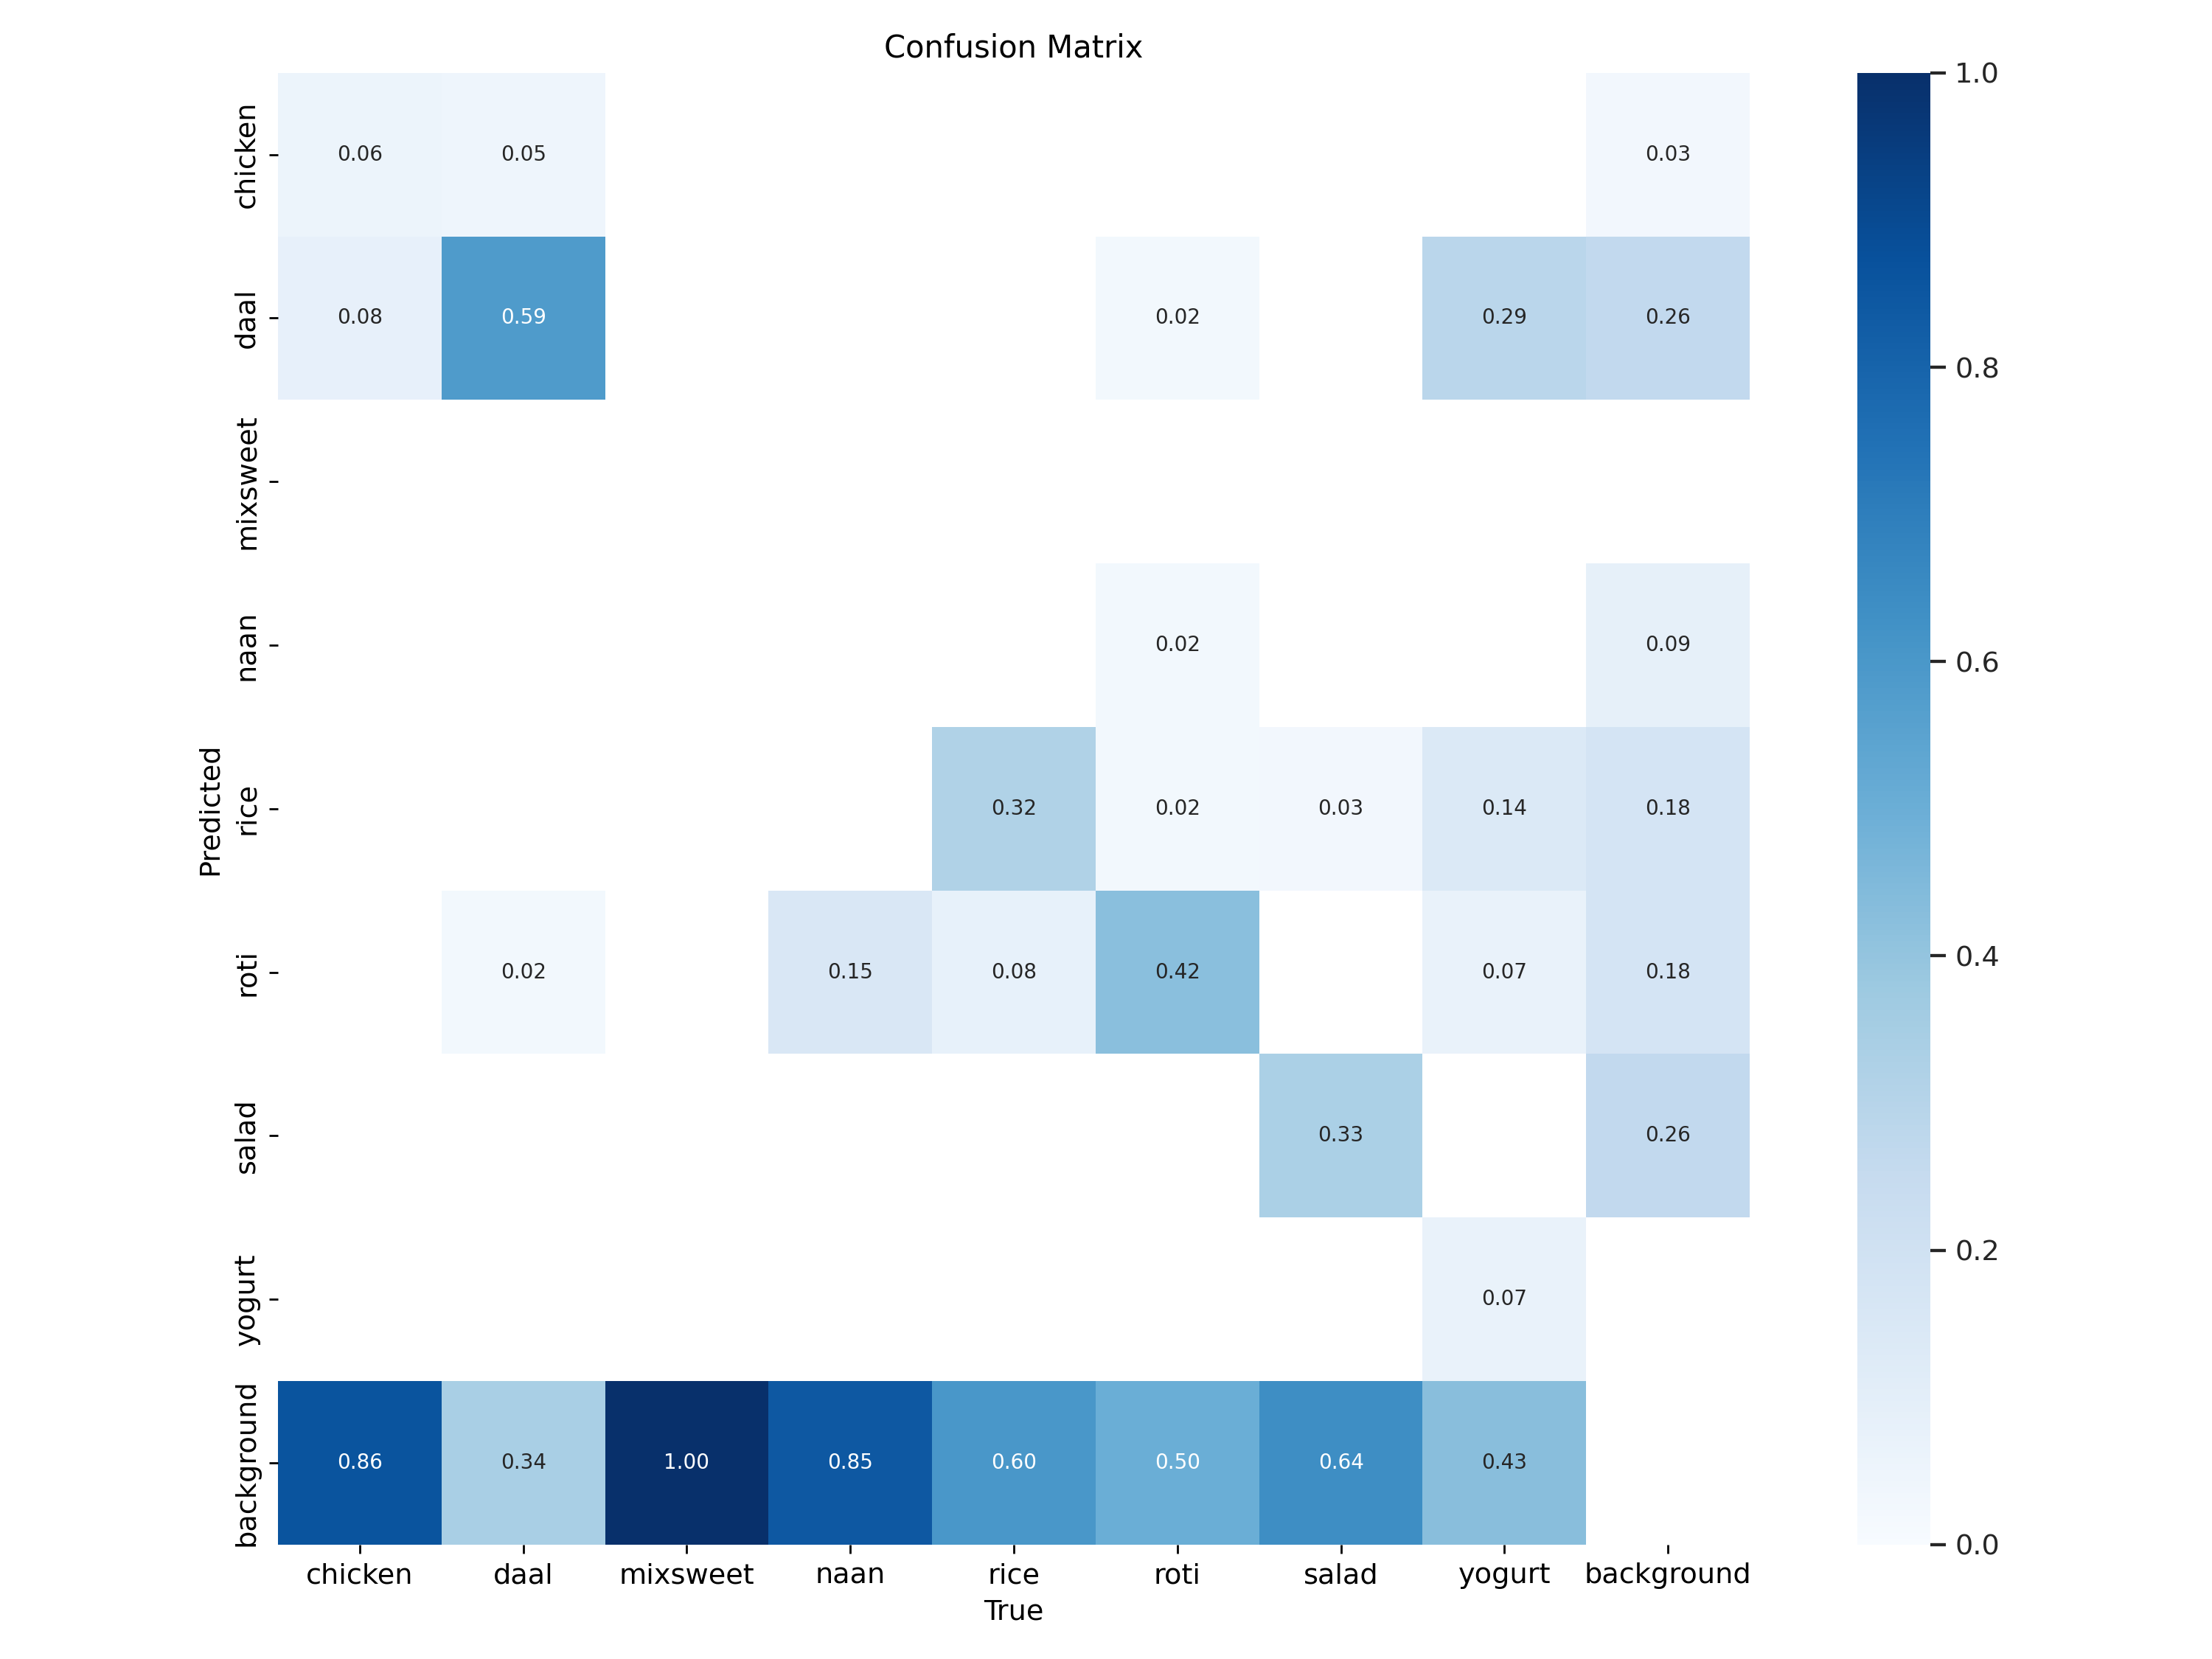

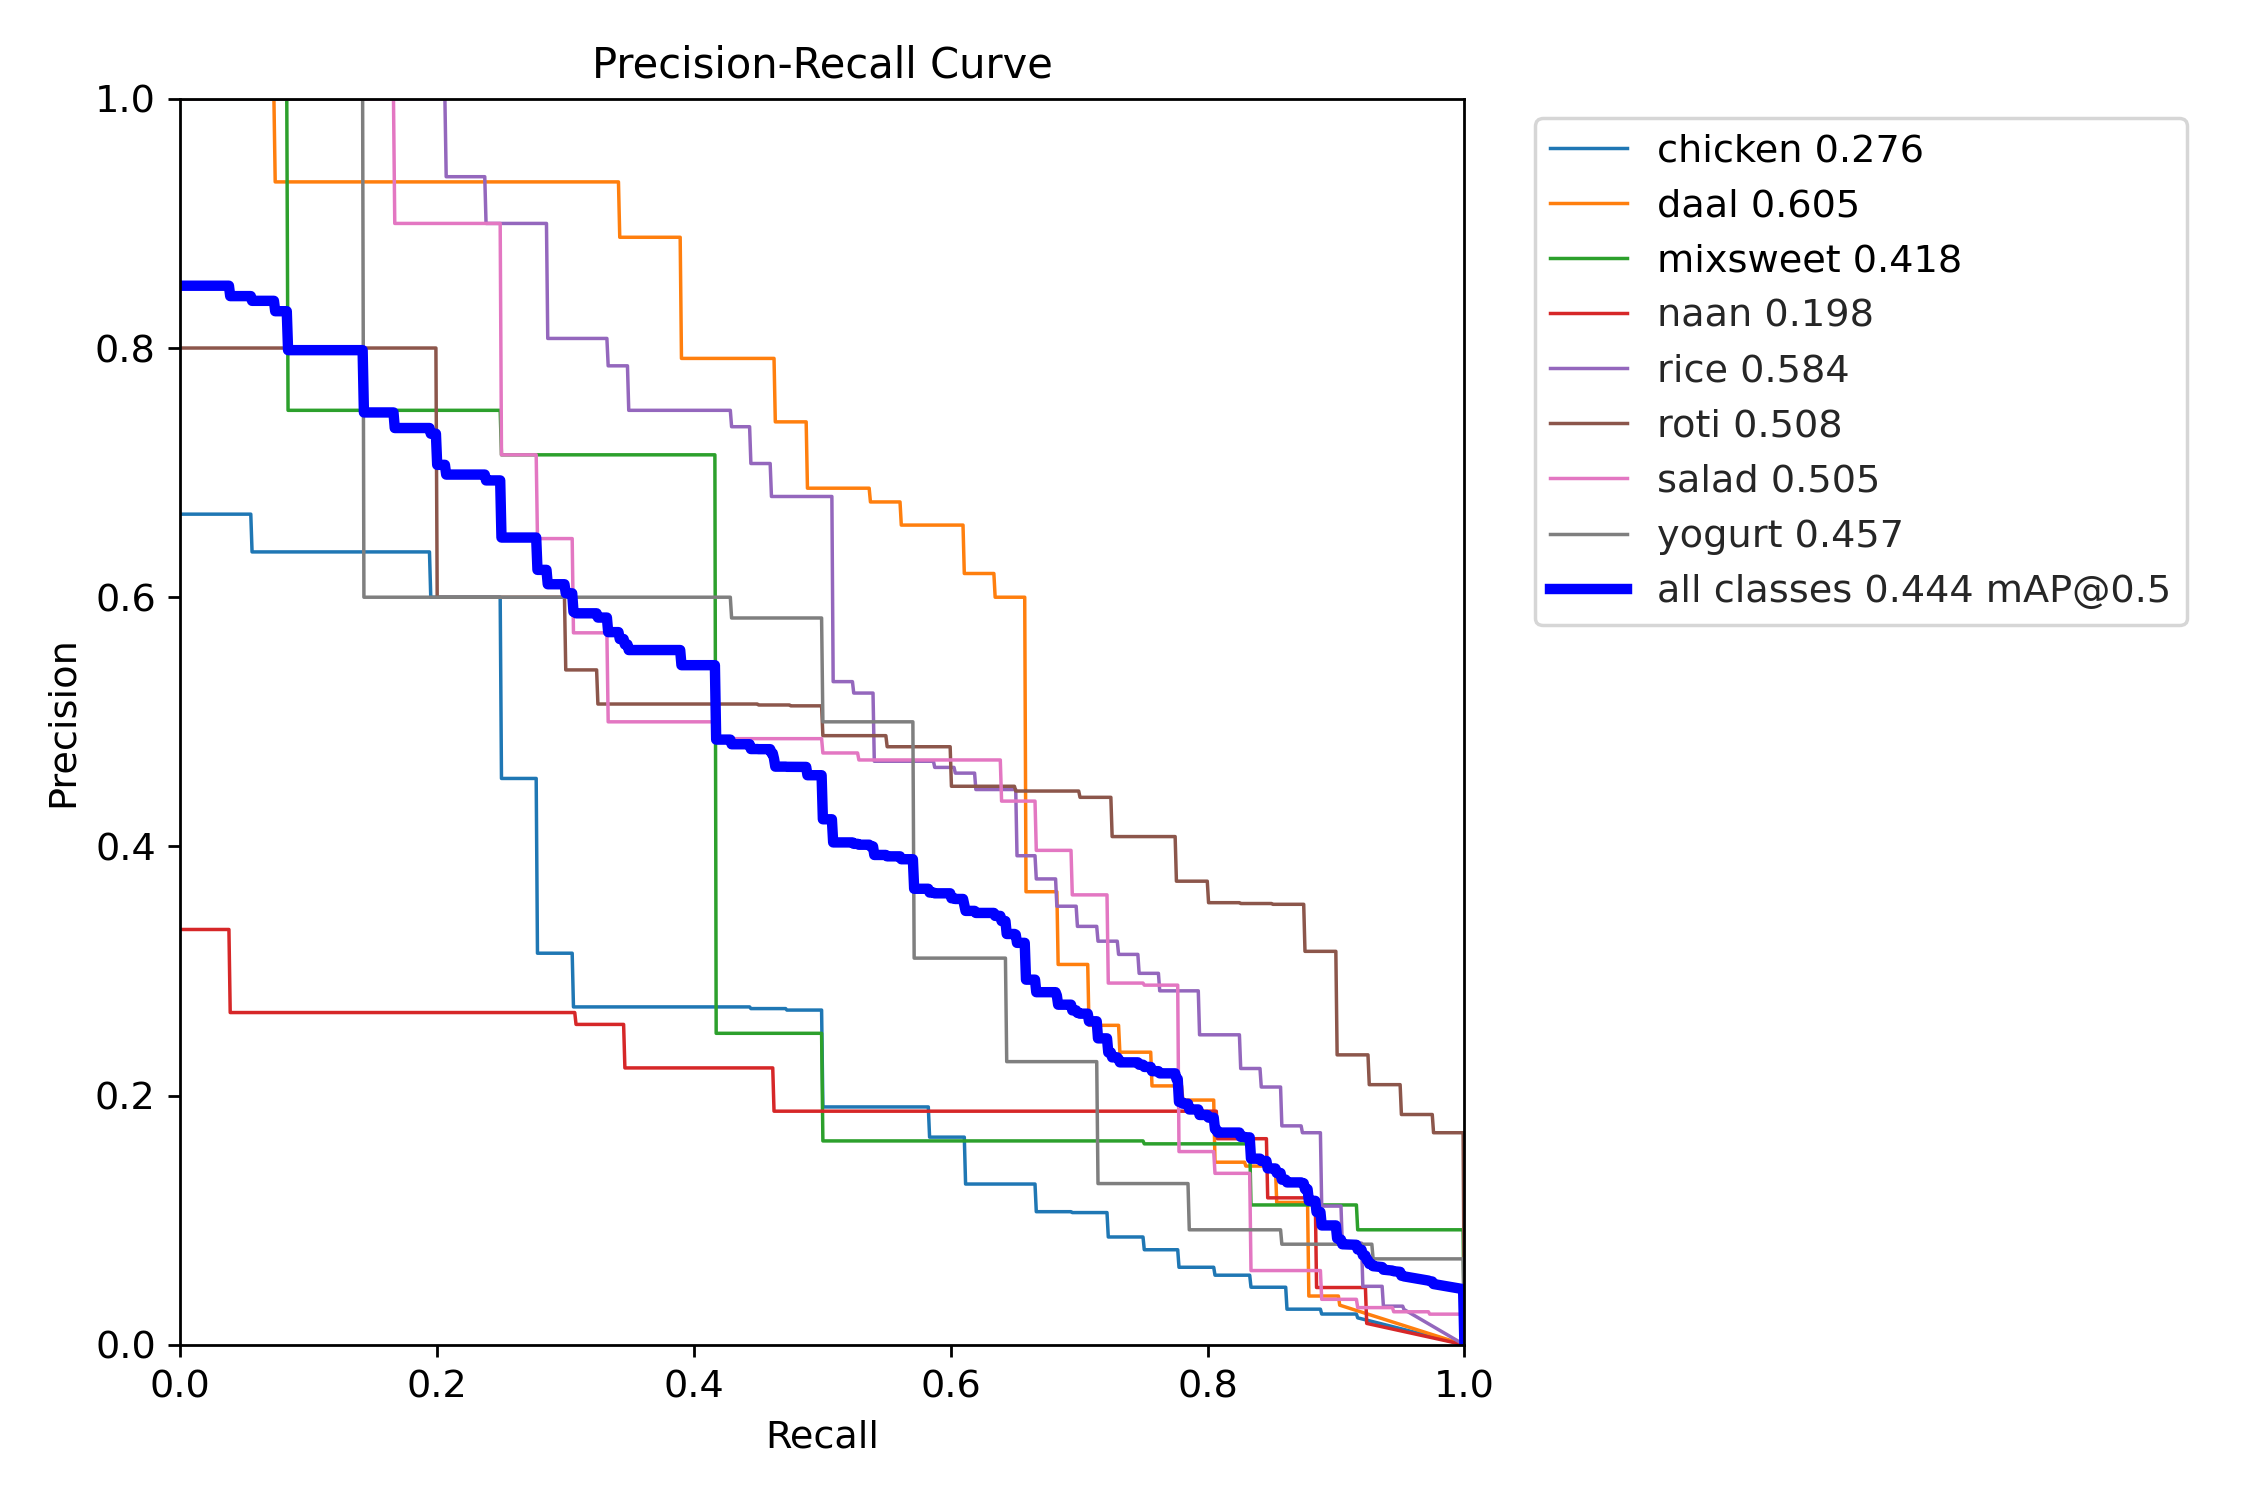

In [ ]:
ft_run_dir = sorted(glob.glob('yolov5/runs/train/cs619_yolov5_finetuned*'))[-1]
ft_best_w = os.path.join(ft_run_dir, 'weights', 'best.pt')

!python val.py --weights "{ft_best_w}" --data "{DATA_YAML_PATH}" --img 640 --task test --name cs619_eval_ft

ft_val_dir = sorted(glob.glob('yolov5/runs/val/cs619_eval_ft*'))[-1]
print("Fine-tuned val dir:", ft_val_dir)

if ft_val_dir:
    for img_name in ['confusion_matrix.png', 'PR_curve.png', 'results.png']:
        p = os.path.join(ft_val_dir, img_name)
        if os.path.isfile(p):
            display(Image(filename=p))